In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
import pylab
import plotly.express as plx
from sklearn.model_selection import train_test_split

In [2]:
ipl = pd.read_csv("IPL_Matches_2008_2022.csv")
ipl

ID        City        Date   Season  MatchNumber  \
0    1312200   Ahmedabad  2022-05-29     2022        Final   
1    1312199   Ahmedabad  2022-05-27     2022  Qualifier 2   
2    1312198     Kolkata  2022-05-25     2022   Eliminator   
3    1312197     Kolkata  2022-05-24     2022  Qualifier 1   
4    1304116      Mumbai  2022-05-22     2022           70   
..       ...         ...         ...      ...          ...   
945   335986     Kolkata  2008-04-20  2007/08            4   
946   335985      Mumbai  2008-04-20  2007/08            5   
947   335984       Delhi  2008-04-19  2007/08            3   
948   335983  Chandigarh  2008-04-19  2007/08            2   
949   335982   Bangalore  2008-04-18  2007/08            1   

                           Team1                        Team2  \
0               Rajasthan Royals               Gujarat Titans   
1    Royal Challengers Bangalore             Rajasthan Royals   
2    Royal Challengers Bangalore         Lucknow Super Giants   
3               Rajasthan Royals               Gujarat Titans   
4            Sunrisers Hyderabad                 Punjab Kings   
..                           ...                          ...   
945        Kolkata Knight Riders              Deccan Chargers   
946               Mumbai Indians  Royal Challengers Bangalore   
947             Delhi Daredevils             Rajasthan Royals   
948              Kings XI Punjab          Chennai Super Kings   
949  Royal Challengers Bangalore        Kolkata Knight Riders   

                                          Venue                   TossWinner  \
0              Narendra Modi Stadium, Ahmedabad             Rajasthan Royals   
1              Narendra Modi Stadium, Ahmedabad             Rajasthan Royals   
2                         Eden Gardens, Kolkata         Lucknow Super Giants   
3                         Eden Gardens, Kolkata               Gujarat Titans   
4                      Wankhede Stadium, Mumbai          Sunrisers Hyderabad   
..                                          ...                          ...   
945                                Eden Gardens              Deccan Chargers   
946                            Wankhede Stadium               Mumbai Indians   
947                            Feroz Shah Kotla             Rajasthan Royals   
948  Punjab Cricket Association Stadium, Mohali          Chennai Super Kings   
949                       M Chinnaswamy Stadium  Royal Challengers Bangalore   

    TossDecision SuperOver                  WinningTeam    WonBy  Margin  \
0            bat         N               Gujarat Titans  Wickets     7.0   
1          field         N             Rajasthan Royals  Wickets     7.0   
2          field         N  Royal Challengers Bangalore     Runs    14.0   
3          field         N               Gujarat Titans  Wickets     7.0   
4            bat         N                 Punjab Kings  Wickets     5.0   
..           ...       ...                          ...      ...     ...   
945          bat         N        Kolkata Knight Riders  Wickets     5.0   
946          bat         N  Royal Challengers Bangalore  Wickets     5.0   
947          bat         N             Delhi Daredevils  Wickets     9.0   
948          bat         N          Chennai Super Kings     Runs    33.0   
949        field         N        Kolkata Knight Riders     Runs   140.0   

    method Player_of_Match                                       Team1Players  \
0      NaN       HH Pandya  ['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...   
1      NaN      JC Buttler  ['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...   
2      NaN      RM Patidar  ['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...   
3      NaN       DA Miller  ['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...   
4      NaN   Harpreet Brar  ['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...   
..     ...             ...                                                ...   
945    NaN       DJ Hussey  ['WP Saha', 'BB

In [3]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               950 non-null    int64  
 1   City             899 non-null    object 
 2   Date             950 non-null    object 
 3   Season           950 non-null    object 
 4   MatchNumber      950 non-null    object 
 5   Team1            950 non-null    object 
 6   Team2            950 non-null    object 
 7   Venue            950 non-null    object 
 8   TossWinner       950 non-null    object 
 9   TossDecision     950 non-null    object 
 10  SuperOver        946 non-null    object 
 11  WinningTeam      946 non-null    object 
 12  WonBy            950 non-null    object 
 13  Margin           932 non-null    float64
 14  method           19 non-null     object 
 15  Player_of_Match  946 non-null    object 
 16  Team1Players     950 non-null    object 
 17  Team2Players    

In [4]:
ipl.describe()

ID      Margin
count  9.500000e+02  932.000000
mean   8.304852e+05   17.056867
std    3.375678e+05   21.633109
min    3.359820e+05    1.000000
25%    5.012612e+05    6.000000
50%    8.297380e+05    8.000000
75%    1.175372e+06   19.000000
max    1.312200e+06  146.000000

In [5]:
# #import label_encoder
# import sklearn
# sklearn.__version__


# # Label_encoder object knows how to understand word labels.
# # label_encoder = preprocessing.LabelEncoder()

# # # Encode labels in column 'species'
# # ipl['City'] = label_encoder.fit_tranform(ipl['City'])

# # ipl['CIty']

In [6]:
# Get the percentage of null values present in each column
ipl.isnull().sum().sort_values(ascending = False)/len(ipl)*100

method             98.000000
City                5.368421
Margin              1.894737
SuperOver           0.421053
Player_of_Match     0.421053
WinningTeam         0.421053
Umpire1             0.000000
Team2Players        0.000000
Team1Players        0.000000
WonBy               0.000000
ID                  0.000000
TossDecision        0.000000
TossWinner          0.000000
Venue               0.000000
Team2               0.000000
Team1               0.000000
MatchNumber         0.000000
Season              0.000000
Date                0.000000
Umpire2             0.000000
dtype: float64

In [7]:
# COnverting the data into datetime format
ipl["Date"] = pd.to_datetime(ipl["Date"])

In [8]:
# Creating new column year the dates
ipl['Year'] = ipl["Date"].dt.year

In [9]:
# Creating new column month the dates
ipl['Month']=ipl["Date"].dt.day

In [10]:
#Creating new column weekday the dates
ipl['Weekday'] = ipl["Date"].dt.weekday

In [11]:
# To know which columns does not have numeric data
# Columns with True are not having Numeric Data
# Columns with False are having Numeric Data
ipl.isna().any()

ID                 False
City                True
Date               False
Season             False
MatchNumber        False
Team1              False
Team2              False
Venue              False
TossWinner         False
TossDecision       False
SuperOver           True
WinningTeam         True
WonBy              False
Margin              True
method              True
Player_of_Match     True
Team1Players       False
Team2Players       False
Umpire1            False
Umpire2            False
Year               False
Month              False
Weekday            False
dtype: bool

In [12]:
ipl.isnull().sum()

ID                   0
City                51
Date                 0
Season               0
MatchNumber          0
Team1                0
Team2                0
Venue                0
TossWinner           0
TossDecision         0
SuperOver            4
WinningTeam          4
WonBy                0
Margin              18
method             931
Player_of_Match      4
Team1Players         0
Team2Players         0
Umpire1              0
Umpire2              0
Year                 0
Month                0
Weekday              0
dtype: int64

In [13]:
# Checking the null values of city column
ipl[ipl["City"].isnull()]

ID City       Date   Season  MatchNumber  \
134  1237181  NaN 2020-11-10  2020/21        Final   
137  1237177  NaN 2020-11-05  2020/21  Qualifier 1   
138  1216495  NaN 2020-11-03  2020/21           56   
140  1216530  NaN 2020-11-01  2020/21           54   
142  1216535  NaN 2020-10-31  2020/21           51   
143  1216502  NaN 2020-10-31  2020/21           52   
145  1216536  NaN 2020-10-29  2020/21           49   
147  1216524  NaN 2020-10-27  2020/21           47   
148  1216520  NaN 2020-10-26  2020/21           46   
150  1216544  NaN 2020-10-25  2020/21           44   
151  1216498  NaN 2020-10-24  2020/21           43   
153  1216521  NaN 2020-10-23  2020/21           41   
154  1216518  NaN 2020-10-22  2020/21           40   
156  1216546  NaN 2020-10-20  2020/21           38   
159  1216517  NaN 2020-10-18  2020/21           36   
160  1216522  NaN 2020-10-17  2020/21           33   
161  1216509  NaN 2020-10-17  2020/21           34   
163  1216531  NaN 2020-10-15  2020/21           31   
164  1216543  NaN 2020-10-14  2020/21           30   
165  1216528  NaN 2020-10-13  2020/21           29   
166  1216540  NaN 2020-10-12  2020/21           28   
167  1216507  NaN 2020-10-11  2020/21           26   
170  1216525  NaN 2020-10-10  2020/21           25   
171  1216500  NaN 2020-10-09  2020/21           23   
172  1216542  NaN 2020-10-08  2020/21           22   
175  1216519  NaN 2020-10-05  2020/21           19   
176  1216513  NaN 2020-10-04  2020/21           18   
177  1216538  NaN 2020-10-04  2020/21           17   
179  1216515  NaN 2020-10-03  2020/21           16   
180  1216516  NaN 2020-10-02  2020/21           14   
182  1216504  NaN 2020-09-30  2020/21           12   
184  1216547  NaN 2020-09-28  2020/21           10   
185  1216527  NaN 2020-09-27  2020/21            9   
187  1216539  NaN 2020-09-25  2020/21            7   
188  1216510  NaN 2020-09-24  2020/21            6   
190  1216496  NaN 2020-09-22  2020/21            4   
191  1216534  NaN 2020-09-21  2020/21            3   
192  1216493  NaN 2020-09-20  2020/21            2   
532   729317  NaN 2014-04-30     2014           20   
534   729313  NaN 2014-04-28     2014           18   
535   729311  NaN 2014-04-27     2014           17   
536   729309  NaN 2014-04-27     2014           16   
539   729301  NaN 2014-04-25     2014           12   
540   729303  NaN 2014-04-25     2014           13   
541   729299  NaN 2014-04-24     2014           11   
542   729297  NaN 2014-04-23     2014           10   
543   729295  NaN 2014-04-22     2014            9   
545   729291  NaN 2014-04-20     2014            7   
546   729289  NaN 2014-04-19     2014            6   
547   729287  NaN 2014-04-19     2014            5   
550   729281  NaN 2014-04-17     2014            2   

                           Team1                        Team2  \
134               Delhi Capitals               Mumbai Indians   
137               Mumbai Indians               Delhi Capitals   
138               Mumbai Indians          Sunrisers Hyderabad   
140        Kolkata Knight Riders             Rajasthan Royals   
142               Delhi Capitals               Mumbai Indians   
143  Royal Challengers Bangalore          Sunrisers Hyderabad   
145        Kolkata Knight Riders          Chennai Super Kings   
147          Sunrisers Hyderabad               Delhi Capitals   
148        Kolkata Knight Riders              Kings XI Punjab   
150  Royal Challengers Bangalore          Chennai Super Kings   
151              Kings XI Punjab          Sunrisers Hyderabad   
153          Chennai Super Kings               Mumbai Indians   
154             Rajasthan Royals          Sunrisers Hyderabad   
156               Delhi Capitals              Kings XI Punjab   
159               Mumbai Indians              Kings XI Punjab   
160             Rajasthan Royals  Royal Challengers Bangalore   
161          Chennai Super Kings               Delhi Capitals   
163  Royal Challengers Bangalor

In [14]:
# Get the index of rows where city is null when venue is Dubai International Cricket Stadium
ipl[(ipl["City"].isnull()) & (ipl["Venue"] == "Dubai International Cricket Stadium")].index

Int64Index([134, 137, 140, 142, 145, 147, 150, 151, 154, 156, 159, 160, 164,
            165, 167, 170, 172, 175, 176, 180, 182, 184, 187, 188, 191, 192,
            532, 534, 539, 540, 542, 546, 547],
           dtype='int64')

In [15]:
# Replacing the null values of city by Dubai where venus is Dubai International Cricket Stadium
for i in [134, 137, 140, 142, 145, 147, 150, 151, 154, 156, 159, 160, 164,
            165, 167, 170, 172, 175, 176, 180, 182, 184, 187, 188, 191, 192,
            532, 534, 539, 540, 542, 546, 547]:
    ipl["City"][i]= "Dubai"

C:\Users\anik\AppData\Local\Temp\ipykernel_2132\786105965.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ipl["City"][i]= "Dubai"


In [16]:
# Get the index of rows where city is null when venue is Sharjah Cricket Stadium
ipl[(ipl["City"].isnull()) & (ipl["Venue"] == "Sharjah Cricket Stadium")].index

Int64Index([138, 143, 148, 153, 161, 163, 166, 171, 177, 179, 185, 190, 535,
            536, 541, 543, 545, 550],
           dtype='int64')

In [17]:
# Replacing the null values of city by Sharjah where venue is Sharjah Cricket Stadium
for i in [138, 143, 148, 153, 161, 163, 166, 171, 177, 179, 185, 190, 535,
            536, 541, 543, 545, 550]:
    ipl["City"][i]="Sharjah"

C:\Users\anik\AppData\Local\Temp\ipykernel_2132\706459451.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ipl["City"][i]="Sharjah"


In [18]:
ipl.isnull().sum()

ID                   0
City                 0
Date                 0
Season               0
MatchNumber          0
Team1                0
Team2                0
Venue                0
TossWinner           0
TossDecision         0
SuperOver            4
WinningTeam          4
WonBy                0
Margin              18
method             931
Player_of_Match      4
Team1Players         0
Team2Players         0
Umpire1              0
Umpire2              0
Year                 0
Month                0
Weekday              0
dtype: int64

In [19]:
ipl["City"].unique()

array(['Ahmedabad', 'Kolkata', 'Mumbai', 'Navi Mumbai', 'Pune', 'Dubai',
       'Sharjah', 'Abu Dhabi', 'Delhi', 'Chennai', 'Hyderabad',
       'Visakhapatnam', 'Chandigarh', 'Bengaluru', 'Jaipur', 'Indore',
       'Bangalore', 'Kanpur', 'Rajkot', 'Raipur', 'Ranchi', 'Cuttack',
       'Dharamsala', 'Kochi', 'Nagpur', 'Johannesburg', 'Centurion',
       'Durban', 'Bloemfontein', 'Port Elizabeth', 'Kimberley',
       'East London', 'Cape Town'], dtype=object)

In [20]:
# Get the null values present in the column Player_of_Match
ipl[ipl["Player_of_Match"].isnull()]

ID       City       Date Season MatchNumber  \
205  1178424  Bengaluru 2019-04-30   2019          49   
437   829813  Bangalore 2015-05-17   2015          55   
464   829763  Bangalore 2015-04-29   2015          29   
708   501265      Delhi 2011-05-21   2011          68   

                           Team1             Team2                  Venue  \
205  Royal Challengers Bangalore  Rajasthan Royals  M.Chinnaswamy Stadium   
437  Royal Challengers Bangalore  Delhi Daredevils  M Chinnaswamy Stadium   
464  Royal Challengers Bangalore  Rajasthan Royals  M Chinnaswamy Stadium   
708             Delhi Daredevils     Pune Warriors       Feroz Shah Kotla   

                      TossWinner TossDecision  ... Margin method  \
205             Rajasthan Royals        field  ...    NaN    NaN   
437  Royal Challengers Bangalore        field  ...    NaN    NaN   
464             Rajasthan Royals        field  ...    NaN    NaN   
708             Delhi Daredevils          bat  ...    NaN    NaN   

    Player_of_Match                                       Team1Players  \
205             NaN  ['V Kohli', 'AB de Villiers', 'MP Stoinis', 'H...   
437             NaN  ['V Kohli', 'CH Gayle', 'AB de Villiers', 'Man...   
464             NaN  ['CH Gayle', 'V Kohli', 'AB de Villiers', 'Man...   
708             NaN  ['NV Ojha', 'DA Warner', 'MS Wade', 'CA Ingram...   

                                          Team2Players          Umpire1  \
205  ['SV Samson', 'LS Livingstone', 'AM Rahane', '...         NJ Llong   
437  ['Q de Kock', 'SS Iyer', 'JP Duminy', 'Yuvraj ...  HDPK Dharmasena   
464  ['AM Rahane', 'SR Watson', 'SPD Smith', 'KK Na...        JD Cloete   
708  ['MK Pandey', 'JP Faulkner', 'SC Ganguly', 'RV...        SS Hazare   

          Umpire2  Year Month Weekday  
205     UV Gandhe  2019    30       1  
437  K Srinivasan  2015    17       6  
464     PG Pathak  2015    29       2  
708     RJ Tucker  2011    21       5  

[4 rows x 23 columns]

In [21]:
# Drop those 4 records
ipl.drop([205,437,464,708], inplace = True)

In [22]:
ipl.isnull().sum()

ID                   0
City                 0
Date                 0
Season               0
MatchNumber          0
Team1                0
Team2                0
Venue                0
TossWinner           0
TossDecision         0
SuperOver            0
WinningTeam          0
WonBy                0
Margin              14
method             927
Player_of_Match      0
Team1Players         0
Team2Players         0
Umpire1              0
Umpire2              0
Year                 0
Month                0
Weekday              0
dtype: int64

In [23]:
ipl[ipl["Margin"].isnull()]

ID       City       Date   Season MatchNumber  \
114  1254077    Chennai 2021-04-25     2021          20   
158  1216512  Abu Dhabi 2020-10-18  2020/21          35   
159  1216517      Dubai 2020-10-18  2020/21          36   
184  1216547      Dubai 2020-09-28  2020/21          10   
192  1216493      Dubai 2020-09-20  2020/21           2   
203  1178426     Mumbai 2019-05-02     2019          51   
244  1175365      Delhi 2019-03-30     2019          10   
339  1082625     Rajkot 2017-04-29     2017          35   
474   829741  Ahmedabad 2015-04-21     2015          18   
533   729315  Abu Dhabi 2014-04-29     2014          19   
608   598017  Bangalore 2013-04-16     2013          21   
621   598004  Hyderabad 2013-04-07     2013           7   
819   419121    Chennai 2010-03-21  2009/10          16   
883   392190  Cape Town 2009-04-23     2009          10   

                           Team1                        Team2  \
114               Delhi Capitals          Sunrisers Hyderabad   
158        Kolkata Knight Riders          Sunrisers Hyderabad   
159               Mumbai Indians              Kings XI Punjab   
184  Royal Challengers Bangalore               Mumbai Indians   
192               Delhi Capitals              Kings XI Punjab   
203               Mumbai Indians          Sunrisers Hyderabad   
244        Kolkata Knight Riders               Delhi Capitals   
339                Gujarat Lions               Mumbai Indians   
474             Rajasthan Royals              Kings XI Punjab   
533        Kolkata Knight Riders             Rajasthan Royals   
608  Royal Challengers Bangalore             Delhi Daredevils   
621          Sunrisers Hyderabad  Royal Challengers Bangalore   
819          Chennai Super Kings              Kings XI Punjab   
883        Kolkata Knight Riders             Rajasthan Royals   

                                         Venue                   TossWinner  \
114   MA Chidambaram Stadium, Chepauk, Chennai               Delhi Capitals   
158                       Sheikh Zayed Stadium          Sunrisers Hyderabad   
159        Dubai International Cricket Stadium               Mumbai Indians   
184        Dubai International Cricket Stadium               Mumbai Indians   
192        Dubai International Cricket Stadium              Kings XI Punjab   
203                           Wankhede Stadium               Mumbai Indians   
244                       Arun Jaitley Stadium               Delhi Capitals   
339     Saurashtra Cricket Association Stadium                Gujarat Lions   
474               Sardar Patel Stadium, Motera              Kings XI Punjab   
533                       Sheikh Zayed Stadium             Rajasthan Royals   
608                      M Chinnaswamy Stadium  Royal Challengers Bangalore   
621  Rajiv Gandhi International Stadium, Uppal  Royal Challengers Bangalore   
819            MA Chidambaram Stadium, Chepauk          Chennai Super Kings   
883                                   Newlands        Kolkata Knight Riders   

    TossDecision  ... Margin method Player_of_Match  \
114          bat  ...    NaN    NaN         PP Shaw   
158        field  ...    NaN    NaN     LH Ferguson   
159          bat  ...    NaN    NaN        KL Rahul   
184        field  ...    NaN    NaN  AB de Villiers   
192        field  ...    NaN    NaN      MP Stoinis   
203          bat  ...    NaN    NaN       JJ Bumrah   
244        field  ...    NaN    NaN         PP Shaw   
339          bat  ...    NaN    NaN       KH Pandya   
474        field  ...    NaN    NaN        SE Marsh   
533          bat  ...    NaN    NaN     JP Faulkner   
608        field  ...    NaN    NaN         V Kohli   
621          bat  ...    NaN    NaN       GH Vihari   
819        field  ...    NaN    NaN        J Theron   
883        field  ...    NaN    NaN       YK Pathan   

                                          Team1Players  \
114  ['PP Shaw', 'S Dhawan', 'RR Pant', 'SPD Smith'...   
158  ['Shubman Gill'

In [24]:
# Replace the null values of Margin column by 0
ipl["Margin"].fillna(0, inplace=True)

In [25]:
ipl.isnull().sum()

ID                   0
City                 0
Date                 0
Season               0
MatchNumber          0
Team1                0
Team2                0
Venue                0
TossWinner           0
TossDecision         0
SuperOver            0
WinningTeam          0
WonBy                0
Margin               0
method             927
Player_of_Match      0
Team1Players         0
Team2Players         0
Umpire1              0
Umpire2              0
Year                 0
Month                0
Weekday              0
dtype: int64

In [26]:
ipl["method"].unique()

array([nan, 'D/L'], dtype=object)

In [27]:
ipl["method"].fillna('usual method', inplace=True)

In [28]:
ipl.isnull().sum()

ID                 0
City               0
Date               0
Season             0
MatchNumber        0
Team1              0
Team2              0
Venue              0
TossWinner         0
TossDecision       0
SuperOver          0
WinningTeam        0
WonBy              0
Margin             0
method             0
Player_of_Match    0
Team1Players       0
Team2Players       0
Umpire1            0
Umpire2            0
Year               0
Month              0
Weekday            0
dtype: int64

In [29]:
ipl.Venue.unique()

array(['Narendra Modi Stadium, Ahmedabad', 'Eden Gardens, Kolkata',
       'Wankhede Stadium, Mumbai', 'Brabourne Stadium, Mumbai',
       'Dr DY Patil Sports Academy, Mumbai',
       'Maharashtra Cricket Association Stadium, Pune',
       'Dubai International Cricket Stadium', 'Sharjah Cricket Stadium',
       'Zayed Cricket Stadium, Abu Dhabi', 'Arun Jaitley Stadium, Delhi',
       'MA Chidambaram Stadium, Chepauk, Chennai', 'Sheikh Zayed Stadium',
       'Rajiv Gandhi International Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'MA Chidambaram Stadium',
       'Punjab Cricket Association IS Bindra Stadium', 'Wankhede Stadium',
       'M.Chinnaswamy Stadium', 'Arun Jaitley Stadium', 'Eden Gardens',
       'Sawai Mansingh Stadium',
       'Maharashtra Cricket Association Stadium',
       'Holkar Cricket Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'M Chinnaswamy Stadium', 'Feroz Shah Kotla', 'Green Park',
       'Punjab Cricket A

In [30]:
# Here we can see that some venue is same but having different name or mistakes in their name
# 1. Wankhede Stadium, Mumbai as Wankhede Stadium
# 2. MA Chidambaram Stadium, Chepauk, Chennai as MA Chidambaram Stadium and MA Chidambaram Stadium, Chepauk
# 3. Arun Jaitley Stadium, Delhi as Arun Jaitley Stadium
# 4. Maharashtra Cricket Association Stadium, Pune as Maharashtra Cricket Association Stadium
# 5. M.Chinnaswamy Stadium as M Chinnaswamy Stadium
# 6. Rajiv Gandhi International Stadium, Uppal as Rajiv Gandhi International Stadium
# 7. Punjab Cricket Association IS Bindra Stadium, Mohali as Punjab Cricket Association IS Bindra Stadium
# 8. Zayed Cricket Stadium, Abu Dhabi as Sheikh Zayed Stadium


In [31]:
# Replacing the "Wankhede Stadium" by "Wankhede Stadium, Mumbai"
for i in ipl["Venue"]:
    if i == "Wankhede Stadium":
        ipl["Venue"].replace("Wankhede Stadium", "Wankhede Stadium, Mumbai", inplace = True)

In [32]:
ipl["Venue"].unique()

array(['Narendra Modi Stadium, Ahmedabad', 'Eden Gardens, Kolkata',
       'Wankhede Stadium, Mumbai', 'Brabourne Stadium, Mumbai',
       'Dr DY Patil Sports Academy, Mumbai',
       'Maharashtra Cricket Association Stadium, Pune',
       'Dubai International Cricket Stadium', 'Sharjah Cricket Stadium',
       'Zayed Cricket Stadium, Abu Dhabi', 'Arun Jaitley Stadium, Delhi',
       'MA Chidambaram Stadium, Chepauk, Chennai', 'Sheikh Zayed Stadium',
       'Rajiv Gandhi International Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'MA Chidambaram Stadium',
       'Punjab Cricket Association IS Bindra Stadium',
       'M.Chinnaswamy Stadium', 'Arun Jaitley Stadium', 'Eden Gardens',
       'Sawai Mansingh Stadium',
       'Maharashtra Cricket Association Stadium',
       'Holkar Cricket Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'M Chinnaswamy Stadium', 'Feroz Shah Kotla', 'Green Park',
       'Punjab Cricket Association IS Bindra

In [33]:
# Replacing the "MA Chidambaram Stadium" and "MA Chidambaram Stadium, Chepauk" by "MA Chidambaram Stadium, Chepauk, Chennai"
for i in ipl["Venue"]:
    if i == "MA Chidambaram Stadium" and "MA Chidambaram Stadium, Chepauk":
        ipl["Venue"].replace("MA Chidambaram Stadium", "MA Chidambaram Stadium, Chepauk, Chennai", inplace = True)
        ipl["Venue"].replace("MA Chidambaram Stadium, Chepauk", "MA Chidambaram Stadium, Chepauk, Chennai", inplace = True)
        

In [34]:
ipl["Venue"].unique()

array(['Narendra Modi Stadium, Ahmedabad', 'Eden Gardens, Kolkata',
       'Wankhede Stadium, Mumbai', 'Brabourne Stadium, Mumbai',
       'Dr DY Patil Sports Academy, Mumbai',
       'Maharashtra Cricket Association Stadium, Pune',
       'Dubai International Cricket Stadium', 'Sharjah Cricket Stadium',
       'Zayed Cricket Stadium, Abu Dhabi', 'Arun Jaitley Stadium, Delhi',
       'MA Chidambaram Stadium, Chepauk, Chennai', 'Sheikh Zayed Stadium',
       'Rajiv Gandhi International Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Punjab Cricket Association IS Bindra Stadium',
       'M.Chinnaswamy Stadium', 'Arun Jaitley Stadium', 'Eden Gardens',
       'Sawai Mansingh Stadium',
       'Maharashtra Cricket Association Stadium',
       'Holkar Cricket Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'M Chinnaswamy Stadium', 'Feroz Shah Kotla', 'Green Park',
       'Punjab Cricket Association IS Bindra Stadium, Mohali',
       'Sauras

In [35]:
# Replacing the "Arun Jaitley Stadium" by "Arun Jaitley Stadium, Delhi"
for i in ipl["Venue"]:
    if i == "Arun Jaitley Stadium":
        ipl["Venue"].replace("Arun Jaitley Stadium", "Arun Jaitley Stadium, Delhi", inplace = True)
                

In [36]:
ipl["Venue"].unique()

array(['Narendra Modi Stadium, Ahmedabad', 'Eden Gardens, Kolkata',
       'Wankhede Stadium, Mumbai', 'Brabourne Stadium, Mumbai',
       'Dr DY Patil Sports Academy, Mumbai',
       'Maharashtra Cricket Association Stadium, Pune',
       'Dubai International Cricket Stadium', 'Sharjah Cricket Stadium',
       'Zayed Cricket Stadium, Abu Dhabi', 'Arun Jaitley Stadium, Delhi',
       'MA Chidambaram Stadium, Chepauk, Chennai', 'Sheikh Zayed Stadium',
       'Rajiv Gandhi International Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Punjab Cricket Association IS Bindra Stadium',
       'M.Chinnaswamy Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Maharashtra Cricket Association Stadium',
       'Holkar Cricket Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'M Chinnaswamy Stadium', 'Feroz Shah Kotla', 'Green Park',
       'Punjab Cricket Association IS Bindra Stadium, Mohali',
       'Saurashtra Cricket Association Stadiu

In [37]:
# Replacing the "Maharashtra Cricket Association Stadium" by "Maharashtra Cricket Association Stadium, Pune"
for i in ipl["Venue"]:
    if i == "Maharashtra Cricket Association Stadium":
        ipl["Venue"].replace("Maharashtra Cricket Association Stadium", "Maharashtra Cricket Association Stadium, Pune", inplace = True)
                

In [38]:
ipl["Venue"].unique()

array(['Narendra Modi Stadium, Ahmedabad', 'Eden Gardens, Kolkata',
       'Wankhede Stadium, Mumbai', 'Brabourne Stadium, Mumbai',
       'Dr DY Patil Sports Academy, Mumbai',
       'Maharashtra Cricket Association Stadium, Pune',
       'Dubai International Cricket Stadium', 'Sharjah Cricket Stadium',
       'Zayed Cricket Stadium, Abu Dhabi', 'Arun Jaitley Stadium, Delhi',
       'MA Chidambaram Stadium, Chepauk, Chennai', 'Sheikh Zayed Stadium',
       'Rajiv Gandhi International Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Punjab Cricket Association IS Bindra Stadium',
       'M.Chinnaswamy Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Holkar Cricket Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'M Chinnaswamy Stadium', 'Feroz Shah Kotla', 'Green Park',
       'Punjab Cricket Association IS Bindra Stadium, Mohali',
       'Saurashtra Cricket Association Stadium',
       'Shaheed Veer Narayan Singh Internation

In [39]:
# Replacing the "M Chinnaswamy Stadium" by "M.Chinnaswamy Stadium"
for i in ipl["Venue"]:
    if i == "M Chinnaswamy Stadium":
        ipl["Venue"].replace("M Chinnaswamy Stadium", "M.Chinnaswamy Stadium", inplace = True)
                

In [40]:
ipl["Venue"].unique()

array(['Narendra Modi Stadium, Ahmedabad', 'Eden Gardens, Kolkata',
       'Wankhede Stadium, Mumbai', 'Brabourne Stadium, Mumbai',
       'Dr DY Patil Sports Academy, Mumbai',
       'Maharashtra Cricket Association Stadium, Pune',
       'Dubai International Cricket Stadium', 'Sharjah Cricket Stadium',
       'Zayed Cricket Stadium, Abu Dhabi', 'Arun Jaitley Stadium, Delhi',
       'MA Chidambaram Stadium, Chepauk, Chennai', 'Sheikh Zayed Stadium',
       'Rajiv Gandhi International Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Punjab Cricket Association IS Bindra Stadium',
       'M.Chinnaswamy Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Holkar Cricket Stadium',
       'Rajiv Gandhi International Stadium, Uppal', 'Feroz Shah Kotla',
       'Green Park',
       'Punjab Cricket Association IS Bindra Stadium, Mohali',
       'Saurashtra Cricket Association Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA

In [41]:
# Replacing the "Rajiv Gandhi International Stadium" by "Rajiv Gandhi International Stadium, Uppal
for i in ipl["Venue"]:
    if i == "Rajiv Gandhi International Stadium":
        ipl["Venue"].replace("Rajiv Gandhi International Stadium", "Rajiv Gandhi International Stadium, Uppal", inplace = True)
                

In [42]:
ipl["Venue"].unique()

array(['Narendra Modi Stadium, Ahmedabad', 'Eden Gardens, Kolkata',
       'Wankhede Stadium, Mumbai', 'Brabourne Stadium, Mumbai',
       'Dr DY Patil Sports Academy, Mumbai',
       'Maharashtra Cricket Association Stadium, Pune',
       'Dubai International Cricket Stadium', 'Sharjah Cricket Stadium',
       'Zayed Cricket Stadium, Abu Dhabi', 'Arun Jaitley Stadium, Delhi',
       'MA Chidambaram Stadium, Chepauk, Chennai', 'Sheikh Zayed Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Punjab Cricket Association IS Bindra Stadium',
       'M.Chinnaswamy Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Holkar Cricket Stadium', 'Feroz Shah Kotla', 'Green Park',
       'Punjab Cricket Association IS Bindra Stadium, Mohali',
       'Saurashtra Cricket Association Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Brabourne Stadium'

In [43]:
# Replacing the "Punjab Cricket Association IS Bindra Stadium" by "Rajiv Gandhi International Stadium, Uppal
for i in ipl["Venue"]:
    if i == "Punjab Cricket Association IS Bindra Stadium":
        ipl["Venue"].replace("Punjab Cricket Association IS Bindra Stadium", "Punjab Cricket Association IS Bindra Stadium, Mohali", inplace = True)
                

In [44]:
ipl["Venue"].unique()

array(['Narendra Modi Stadium, Ahmedabad', 'Eden Gardens, Kolkata',
       'Wankhede Stadium, Mumbai', 'Brabourne Stadium, Mumbai',
       'Dr DY Patil Sports Academy, Mumbai',
       'Maharashtra Cricket Association Stadium, Pune',
       'Dubai International Cricket Stadium', 'Sharjah Cricket Stadium',
       'Zayed Cricket Stadium, Abu Dhabi', 'Arun Jaitley Stadium, Delhi',
       'MA Chidambaram Stadium, Chepauk, Chennai', 'Sheikh Zayed Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Punjab Cricket Association IS Bindra Stadium, Mohali',
       'M.Chinnaswamy Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Holkar Cricket Stadium', 'Feroz Shah Kotla', 'Green Park',
       'Saurashtra Cricket Association Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Brabourne Stadium',
       'Punjab Cricket Association Stadium, Mohali',


In [45]:
# Replacing the "Sheikh Zayed Stadium" by "Rajiv Gandhi International Stadium, Uppal
for i in ipl["Venue"]:
    if i == "Sheikh Zayed Stadium":
        ipl["Venue"].replace("Sheikh Zayed Stadium", "Zayed Cricket Stadium, Abu Dhabi", inplace = True)
                

In [46]:
ipl["Venue"].unique()

array(['Narendra Modi Stadium, Ahmedabad', 'Eden Gardens, Kolkata',
       'Wankhede Stadium, Mumbai', 'Brabourne Stadium, Mumbai',
       'Dr DY Patil Sports Academy, Mumbai',
       'Maharashtra Cricket Association Stadium, Pune',
       'Dubai International Cricket Stadium', 'Sharjah Cricket Stadium',
       'Zayed Cricket Stadium, Abu Dhabi', 'Arun Jaitley Stadium, Delhi',
       'MA Chidambaram Stadium, Chepauk, Chennai',
       'Rajiv Gandhi International Stadium, Uppal',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Punjab Cricket Association IS Bindra Stadium, Mohali',
       'M.Chinnaswamy Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Holkar Cricket Stadium', 'Feroz Shah Kotla', 'Green Park',
       'Saurashtra Cricket Association Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Brabourne Stadium',
       'Punjab Cricket Association Stadium, Mohali',
       'Sardar Patel Sta

# Question_1: How many matches played as per the dataset?

In [47]:
# Total number of matches played
ipl["ID"].count()

946

# Question_2: How many IPL season's data we have?

In [48]:
# To get year of seasons
ipl.Year.unique()

array([2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012,
       2011, 2010, 2009, 2008], dtype=int64)

In [49]:
# To get number of seasons
ipl.Year.nunique()

15

In [50]:
ipl.columns

Index(['ID', 'City', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2',
       'Venue', 'TossWinner', 'TossDecision', 'SuperOver', 'WinningTeam',
       'WonBy', 'Margin', 'method', 'Player_of_Match', 'Team1Players',
       'Team2Players', 'Umpire1', 'Umpire2', 'Year', 'Month', 'Weekday'],
      dtype='object')

In [51]:
# Creating the list of season number
Season_Number = []
for i in ipl["Year"]:
    if i == 2008:
        Season_Number.append(1)
    elif i == 2009:
        Season_Number.append(2)
    elif i == 2010:
        Season_Number.append(3)
    elif i == 2011:
        Season_Number.append(4)
    elif i == 2012:
        Season_Number.append(5)
    elif i == 2013:
        Season_Number.append(6)
    elif i == 2014:
        Season_Number.append(7)
    elif i == 2015:
        Season_Number.append(8)
    elif i == 2016:
        Season_Number.append(9)
    elif i == 2017:
        Season_Number.append(10)
    elif i == 2018:
        Season_Number.append(11)
    elif i == 2019:
        Season_Number.append(12)
    elif i == 2020:
        Season_Number.append(13)
    elif i == 2021:
        Season_Number.append(14)
    elif i == 2022:
        Season_Number.append(15)
           

In [52]:
ipl["Season_Number"] = Season_Number

In [53]:
ipl.columns

Index(['ID', 'City', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2',
       'Venue', 'TossWinner', 'TossDecision', 'SuperOver', 'WinningTeam',
       'WonBy', 'Margin', 'method', 'Player_of_Match', 'Team1Players',
       'Team2Players', 'Umpire1', 'Umpire2', 'Year', 'Month', 'Weekday',
       'Season_Number'],
      dtype='object')

In [54]:
ipl.tail()

ID        City       Date   Season MatchNumber  \
945  335986     Kolkata 2008-04-20  2007/08           4   
946  335985      Mumbai 2008-04-20  2007/08           5   
947  335984       Delhi 2008-04-19  2007/08           3   
948  335983  Chandigarh 2008-04-19  2007/08           2   
949  335982   Bangalore 2008-04-18  2007/08           1   

                           Team1                        Team2  \
945        Kolkata Knight Riders              Deccan Chargers   
946               Mumbai Indians  Royal Challengers Bangalore   
947             Delhi Daredevils             Rajasthan Royals   
948              Kings XI Punjab          Chennai Super Kings   
949  Royal Challengers Bangalore        Kolkata Knight Riders   

                                          Venue                   TossWinner  \
945                                Eden Gardens              Deccan Chargers   
946                    Wankhede Stadium, Mumbai               Mumbai Indians   
947                            Feroz Shah Kotla             Rajasthan Royals   
948  Punjab Cricket Association Stadium, Mohali          Chennai Super Kings   
949                       M.Chinnaswamy Stadium  Royal Challengers Bangalore   

    TossDecision  ...        method Player_of_Match  \
945          bat  ...  usual method       DJ Hussey   
946          bat  ...  usual method      MV Boucher   
947          bat  ...  usual method     MF Maharoof   
948          bat  ...  usual method      MEK Hussey   
949        field  ...  usual method     BB McCullum   

                                          Team1Players  \
945  ['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...   
946  ['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...   
947  ['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...   
948  ['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...   
949  ['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...   

                                          Team2Players    Umpire1  \
945  ['AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxma...  BF Bowden   
946  ['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...   SJ Davis   
947  ['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif'...  Aleem Dar   
948  ['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh...  MR Benson   
949  ['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...  Asad Rauf   

            Umpire2  Year Month Weekday Season_Number  
945     K Hariharan  2008    20       6             1  
946       DJ Harper  2008    20       6             1  
947  GA Pratapkumar  2008    19       5             1  
948      SL Shastri  2008    19       5             1  
949     RE Koertzen  2008    18       4             1  

[5 rows x 24 columns]

# Question_3: Get the details of the match won by the maximum margin of runs?:

In [55]:
ipl.iloc[ipl["Margin"].idxmin()]

ID                                                           1254077
City                                                         Chennai
Date                                             2021-04-25 00:00:00
Season                                                          2021
MatchNumber                                                       20
Team1                                                 Delhi Capitals
Team2                                            Sunrisers Hyderabad
Venue                       MA Chidambaram Stadium, Chepauk, Chennai
TossWinner                                            Delhi Capitals
TossDecision                                                     bat
SuperOver                                                          Y
WinningTeam                                           Delhi Capitals
WonBy                                                      SuperOver
Margin                                                           0.0
method                            

# Question_4: Which season consisted of the highest number of matches ever played?

In [56]:
ipl.Season.value_counts().sort_values(ascending = False)

2013       76
2022       74
2012       74
2011       72
2021       60
2020/21    60
2018       60
2016       60
2014       60
2009/10    60
2019       59
2017       59
2007/08    58
2015       57
2009       57
Name: Season, dtype: int64

In [57]:
# plt.figure(figsize = (10, 5))
# sns.countplot(ipl.Season)
# plt.xlabel("Season", fontsize = 16)
# plt.ylabel("Number of Matches", fontsize = 16)
# plt.title("Number pf matches played per Season", fontsize = 18)
# plt.show()

In [58]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 946 entries, 0 to 949
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ID               946 non-null    int64         
 1   City             946 non-null    object        
 2   Date             946 non-null    datetime64[ns]
 3   Season           946 non-null    object        
 4   MatchNumber      946 non-null    object        
 5   Team1            946 non-null    object        
 6   Team2            946 non-null    object        
 7   Venue            946 non-null    object        
 8   TossWinner       946 non-null    object        
 9   TossDecision     946 non-null    object        
 10  SuperOver        946 non-null    object        
 11  WinningTeam      946 non-null    object        
 12  WonBy            946 non-null    object        
 13  Margin           946 non-null    float64       
 14  method           946 non-null    object   

# Question_5: Find the number of matches played by each team ? 

In [59]:
# Creating the variable list as matches and converting that into Series
matches = list(ipl["Team1"]) + list(ipl["Team2"])
matches = pd.Series(matches)

In [60]:
matches_df = pd.DataFrame(matches)

In [61]:
# Number of matches played by each team
matches.value_counts().sort_values(ascending = False)

Mumbai Indians                 231
Kolkata Knight Riders          223
Royal Challengers Bangalore    223
Chennai Super Kings            208
Kings XI Punjab                190
Rajasthan Royals               190
Delhi Daredevils               159
Sunrisers Hyderabad            152
Deccan Chargers                 75
Delhi Capitals                  63
Pune Warriors                   45
Gujarat Lions                   30
Punjab Kings                    28
Gujarat Titans                  16
Rising Pune Supergiant          16
Lucknow Super Giants            15
Rising Pune Supergiants         14
Kochi Tuskers Kerala            14
dtype: int64

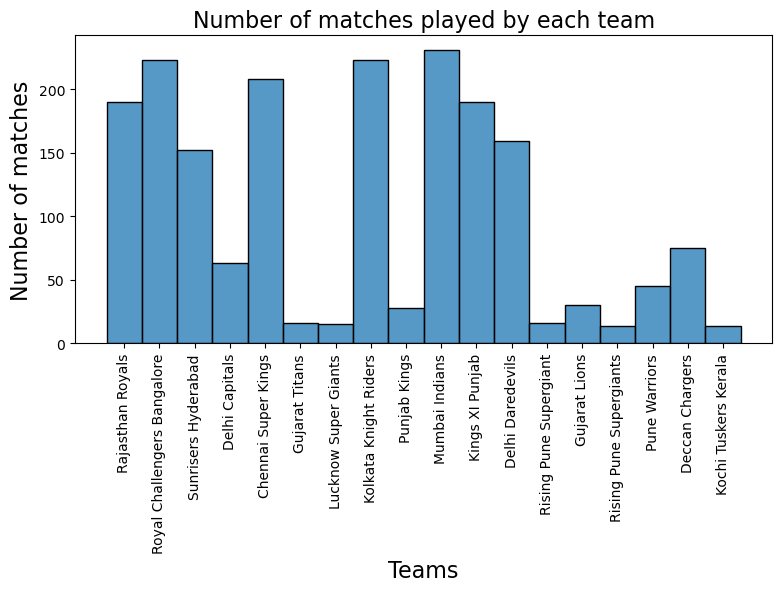

In [62]:
plt.figure(figsize = (9, 4))
sns.histplot(matches)
plt.xticks(rotation = 90)
plt.xlabel("Teams", fontsize = 16)
plt.ylabel("Number of matches", fontsize = 16)
plt.title("Number of matches played by each team", fontsize = 16)
plt.show()

In [63]:
plx.histogram(matches, width = 800, height = 400, labels = {"value" : "Teams", "count" : "Number_of_Matches"}, title = "Number of matches played by each team")

# Question_6: Which is the most successful team ? 

In [64]:
ipl.WinningTeam.value_counts()

Mumbai Indians                 131
Chennai Super Kings            121
Kolkata Knight Riders          114
Royal Challengers Bangalore    109
Rajasthan Royals                96
Kings XI Punjab                 88
Sunrisers Hyderabad             75
Delhi Daredevils                67
Delhi Capitals                  36
Deccan Chargers                 29
Gujarat Lions                   13
Punjab Kings                    13
Pune Warriors                   12
Gujarat Titans                  12
Rising Pune Supergiant          10
Lucknow Super Giants             9
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: WinningTeam, dtype: int64

Text(0.5, 1.0, 'Boxplot')

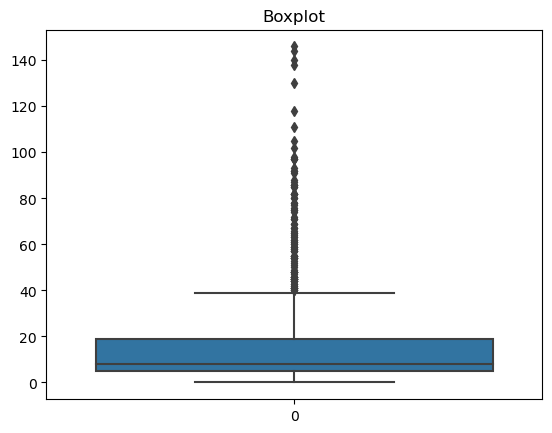

In [65]:
# Let's find outliers in Margin
sns.boxplot(ipl.Margin)
plt.title('Boxplot')

In [66]:
# from feature_engine.outliers import Winsorizer


In [67]:
# # winsor = Winsorizer(capping_method='iqr',  # Choose IQR rule boundries or gaussian for mean and S.D
#                    tail = 'both', # cap left, right or both tailes
#                    fold = 1.5,
#                    variables=['Margin'])

In [68]:
# ipl_t = winsor.fit_transform(ipl[["Margin"]])
# ipl_t

In [69]:
# # We can inspect the minimum and maximum caps
# winsor.left_tail_caps_, winsor.right_tail_caps_

# # Lets see boxplot
# sns.boxplot(ipl_t.Margin);plt.title("Boxplot");plt.show()

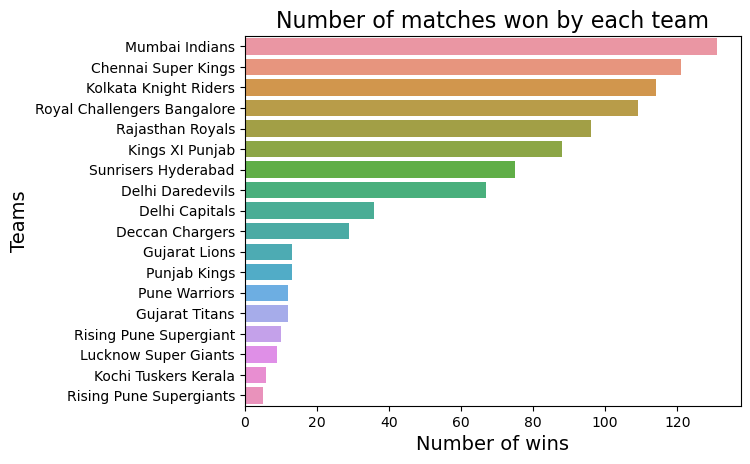

In [70]:
sns.barplot(x = ipl.WinningTeam.value_counts(), y = ipl.WinningTeam.value_counts().index)
plt.xlabel("Number of wins", fontsize = 14)
plt.ylabel("Teams", fontsize = 14)
plt.title("Number of matches won by each team", fontsize = 16)
plt.show()

In [71]:
import plotly.express as plx

In [72]:
plx.bar(ipl.WinningTeam.value_counts(), labels={"index": "Teams", "value":"Number of matches won"})

In [73]:
ipl.columns

Index(['ID', 'City', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2',
       'Venue', 'TossWinner', 'TossDecision', 'SuperOver', 'WinningTeam',
       'WonBy', 'Margin', 'method', 'Player_of_Match', 'Team1Players',
       'Team2Players', 'Umpire1', 'Umpire2', 'Year', 'Month', 'Weekday',
       'Season_Number'],
      dtype='object')

# Question_7: Get the highest wins by teams per season

In [74]:
ipl.groupby(ipl["Season"])["WinningTeam"].value_counts()

Season   WinningTeam          
2007/08  Rajasthan Royals         13
         Kings XI Punjab          10
         Chennai Super Kings       9
         Delhi Daredevils          7
         Mumbai Indians            7
                                  ..
2022     Punjab Kings              7
         Kolkata Knight Riders     6
         Sunrisers Hyderabad       6
         Chennai Super Kings       4
         Mumbai Indians            4
Name: WinningTeam, Length: 126, dtype: int64

In [75]:
ipl.Player_of_Match.value_counts().sort_values(ascending = False)[:10]
# Here we got the AB de Villiers has got most mom awards

AB de Villiers    25
CH Gayle          22
DA Warner         18
RG Sharma         18
MS Dhoni          17
YK Pathan         16
SR Watson         16
KA Pollard        14
SK Raina          14
V Kohli           14
Name: Player_of_Match, dtype: int64

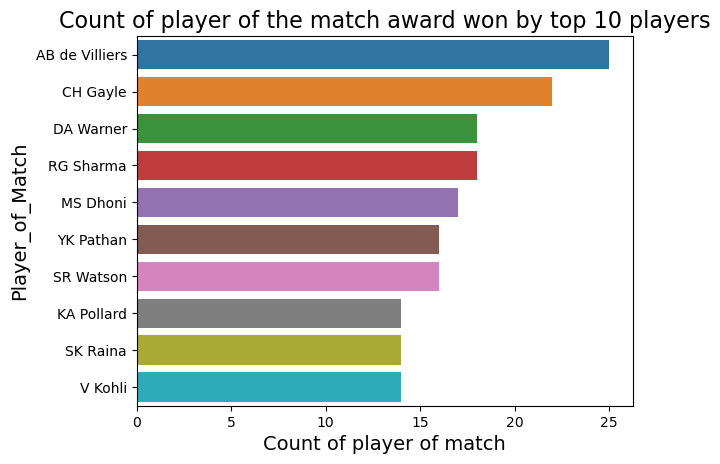

In [76]:
sns.barplot(x = ipl["Player_of_Match"].value_counts(ascending = False)[:10], y = ipl["Player_of_Match"].value_counts(ascending = False)[:10].index)
plt.xlabel("Count of player of match", fontsize = 14)
plt.ylabel("Player_of_Match", fontsize = 14)
plt.title("Count of player of the match award won by top 10 players", fontsize = 16)
plt.show()

# Question_9: How many number of matches playes per city

In [77]:
ipl["City"].value_counts().sort_values(ascending = False)

Mumbai            159
Kolkata            79
Delhi              77
Chennai            67
Hyderabad          64
Bangalore          63
Chandigarh         56
Pune               51
Jaipur             47
Dubai              46
Abu Dhabi          37
Sharjah            28
Ahmedabad          19
Durban             15
Bengaluru          14
Visakhapatnam      13
Centurion          12
Rajkot             10
Indore              9
Navi Mumbai         9
Dharamsala          9
Johannesburg        8
Port Elizabeth      7
Cape Town           7
Cuttack             7
Ranchi              7
Raipur              6
Kochi               5
Kanpur              4
Nagpur              3
Kimberley           3
East London         3
Bloemfontein        2
Name: City, dtype: int64

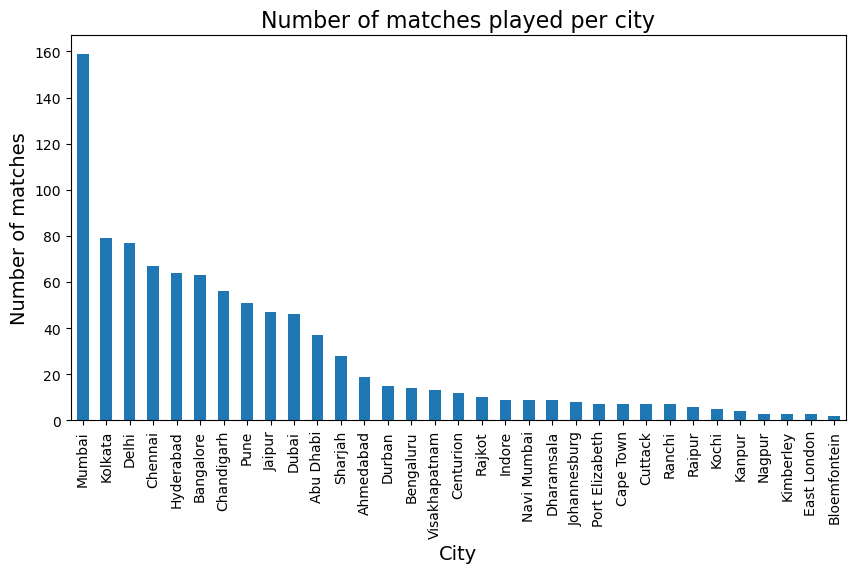

In [78]:
plt.figure(figsize=(10,5))
ipl["City"].value_counts().sort_values(ascending = False).plot(kind = "bar")
plt.xlabel("City", fontsize = 14)
plt.ylabel("Number of matches", fontsize = 14)
plt.title("Number of matches played per city", fontsize = 16)
plt.show()

In [123]:
# plt.figure(figsize=(9,5))
# sns.countplot(ipl['City'].sort_values(ascending = True ))  # Sorting based on City names
# plt.xticks(rotation = 90)
# plt.xlabel("Teams", fontsize = 14)
# plt.ylabel("Number of matches played", fontsize = 14)
# plt.title("Number of matches played in each city", fontsize = 16)
# plt.show()

# Question_10: Define a function to get total matches played by each team?

In [80]:
def Total_match(team_name):
    count_match1 = 0
    for i in ipl["Team1"]:
        if i == team_name:
            count_match1 += 1
  

    count_match2 = 0
    for j in ipl["Team2"]:
        if j == team_name:
            count_match2 += 1
 

    print(count_match1  + count_match2)

In [81]:
Total_match("Mumbai Indians")

231


# Question_11: Compare the matches played and won for each team.

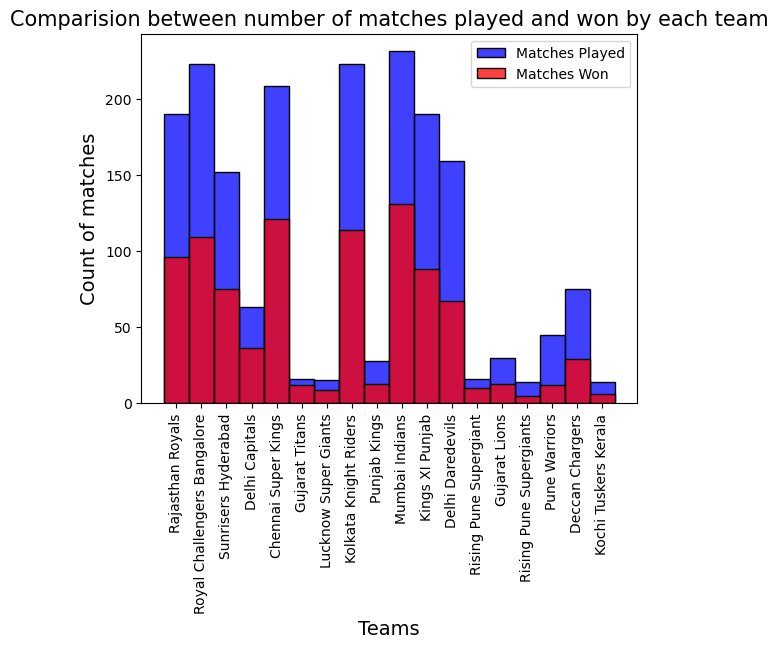

In [114]:
sns.histplot(matches, color='blue')
sns.histplot(ipl['WinningTeam'], color='red')
plt.xticks(rotation=90)
plt.legend(['Matches Played','Matches Won'])
plt.xlabel('Teams', fontsize = 14)
plt.title("Comparision between number of matches played and won by each team", fontsize = 15)
plt.ylabel("Count of matches", fontsize = 14)
plt.show()

# Question_12: Get team's winning proportion for each Year

Year : 2022 -------------------------------------------


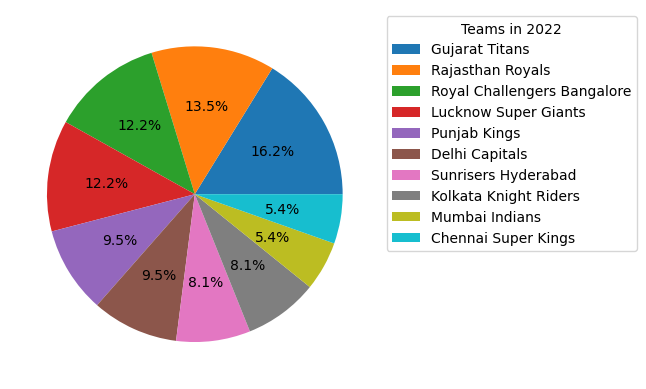

Year : 2021 -------------------------------------------


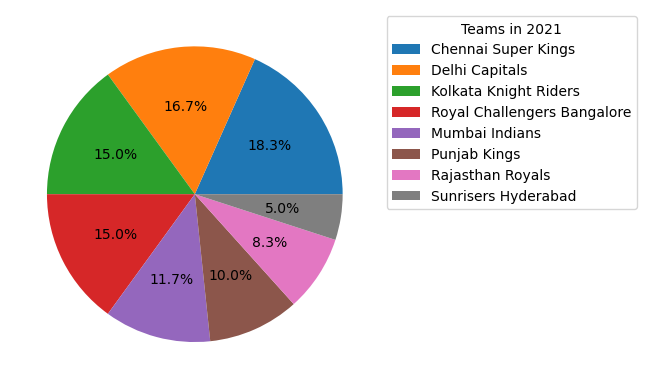

Year : 2020 -------------------------------------------


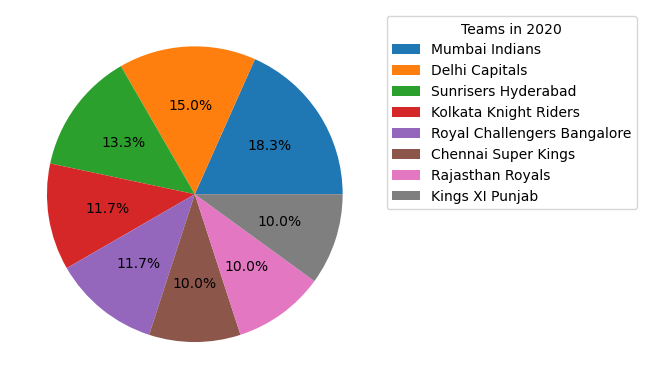

Year : 2019 -------------------------------------------


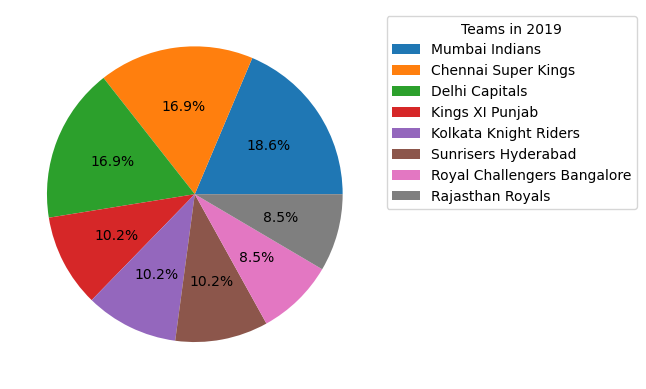

Year : 2018 -------------------------------------------


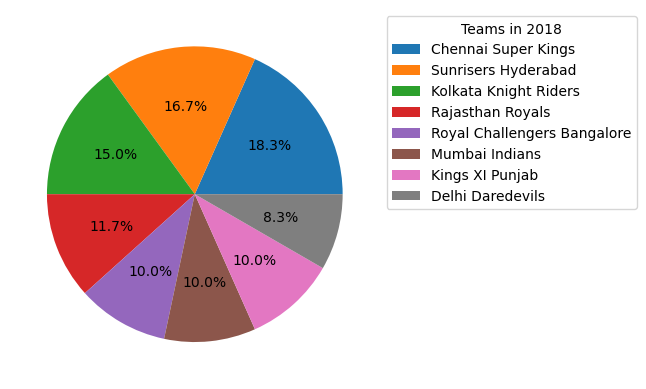

Year : 2017 -------------------------------------------


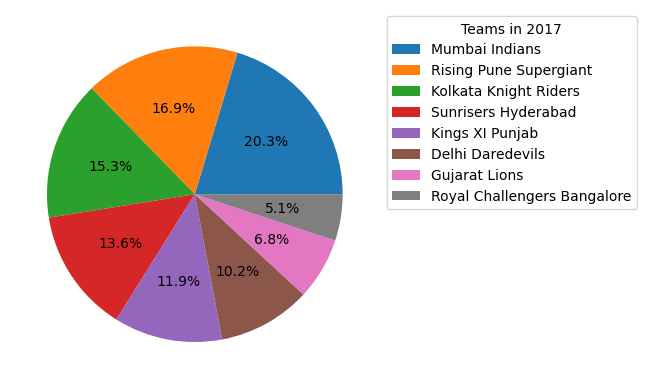

Year : 2016 -------------------------------------------


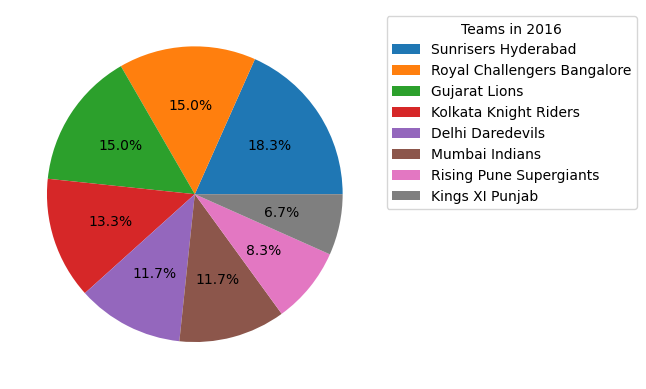

Year : 2015 -------------------------------------------


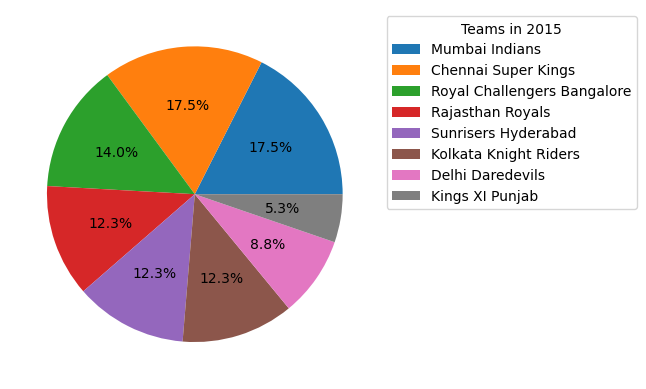

Year : 2014 -------------------------------------------


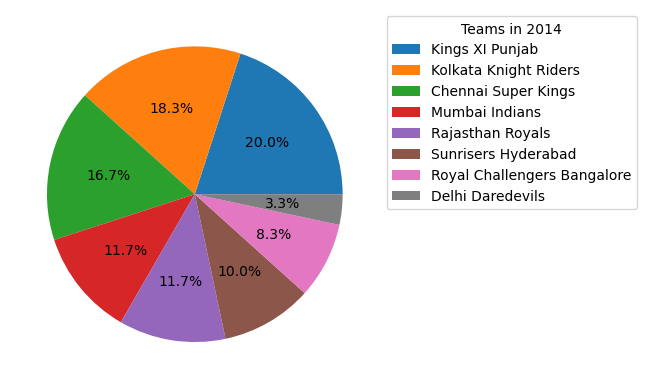

Year : 2013 -------------------------------------------


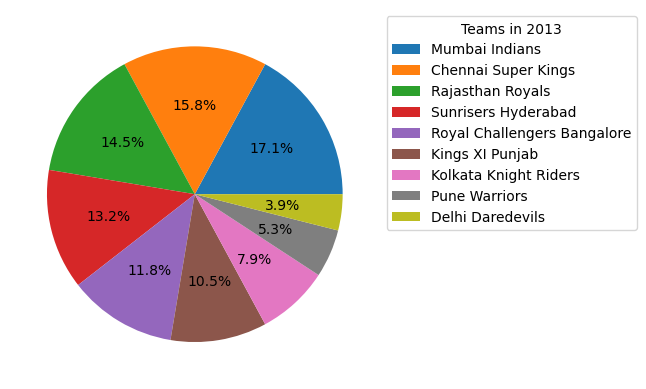

Year : 2012 -------------------------------------------


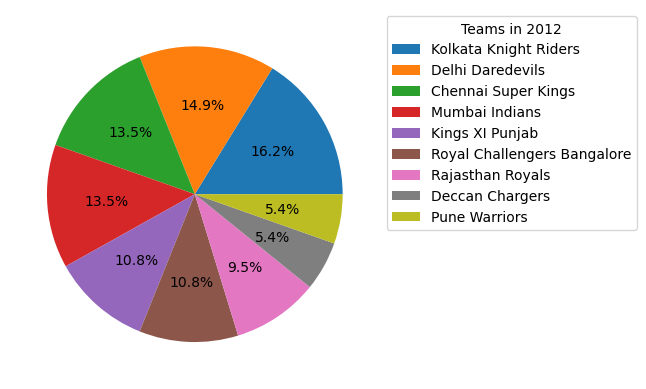

Year : 2011 -------------------------------------------


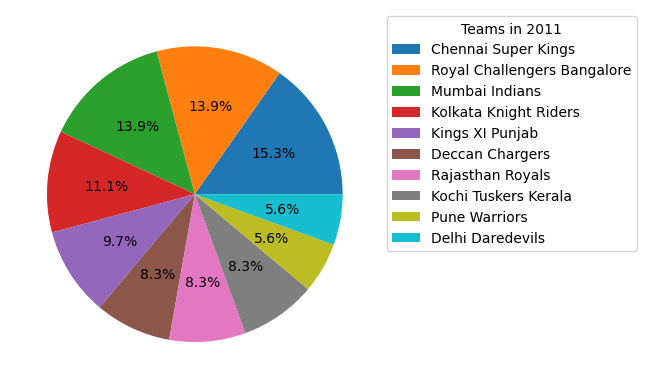

Year : 2010 -------------------------------------------


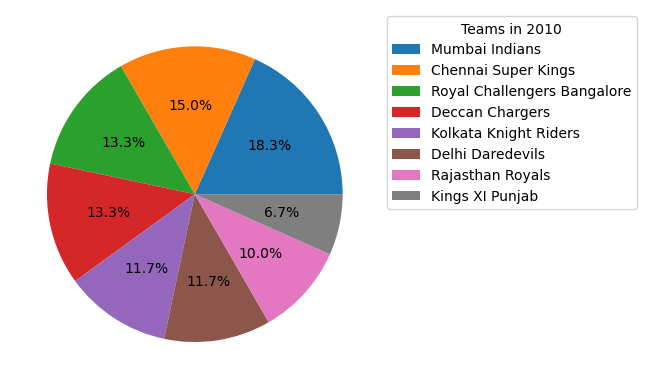

Year : 2009 -------------------------------------------


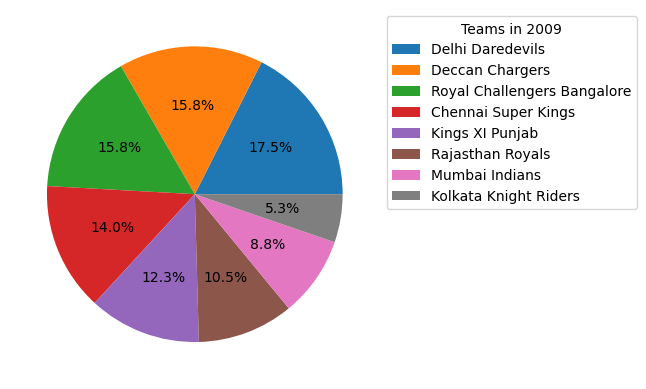

Year : 2008 -------------------------------------------


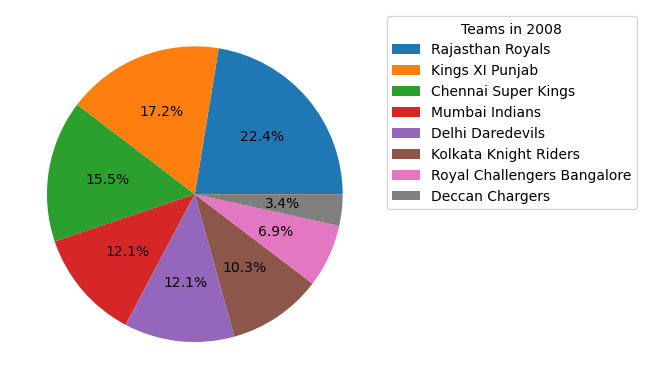

In [83]:
for i in ipl.Year.unique():
    print("Year :", i,"-------------------------------------------")
    plt.pie(ipl[ipl["Year"]== i]["WinningTeam"].value_counts(), autopct = "%1.1f%%")
    plt.legend(ipl[ipl["Year"]== i]["WinningTeam"].value_counts().index, bbox_to_anchor = (1,1),title='Teams in {}'.format(i) ) # The bbox_to_anchor argument is used to specify the precise placement of the legend.
    plt.show()

Winner:  Gujarat Titans


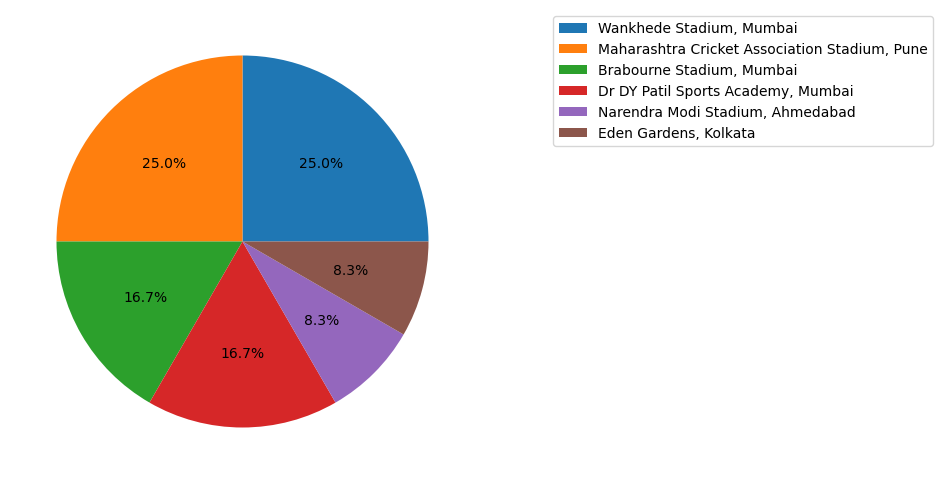

Winner:  Rajasthan Royals


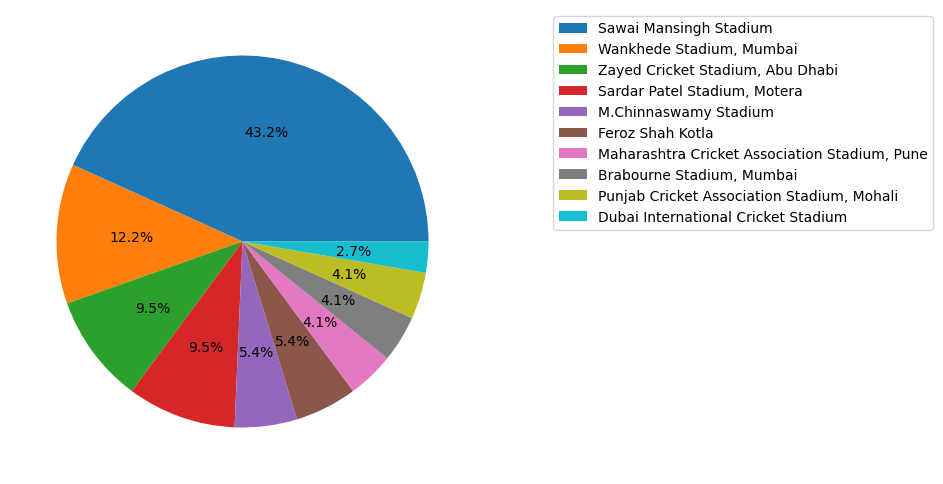

Winner:  Royal Challengers Bangalore


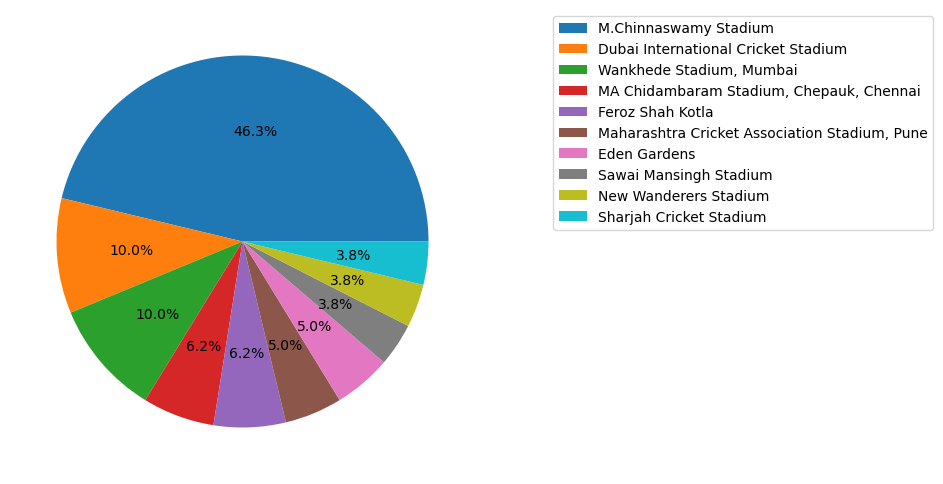

Winner:  Punjab Kings


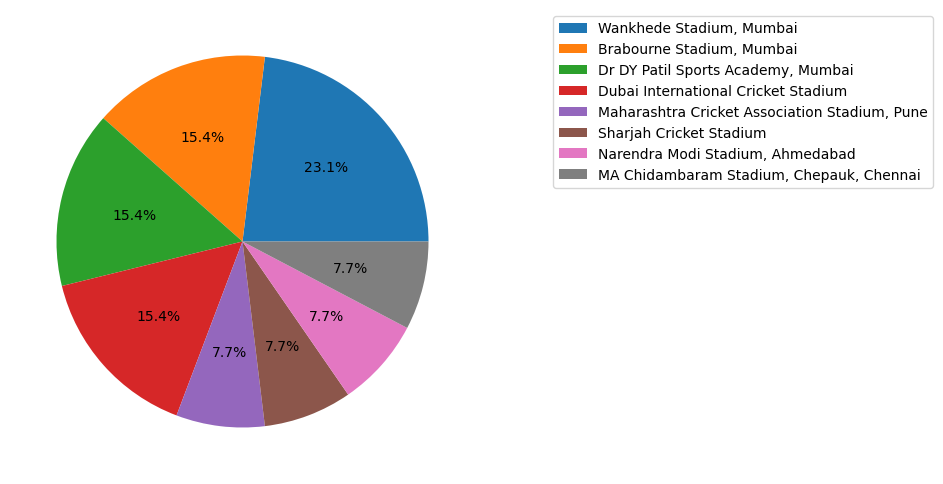

Winner:  Mumbai Indians


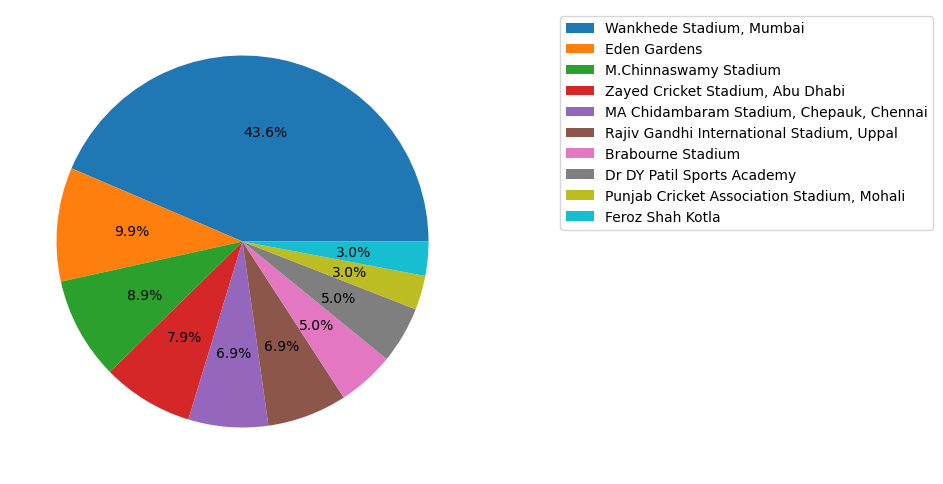

Winner:  Lucknow Super Giants


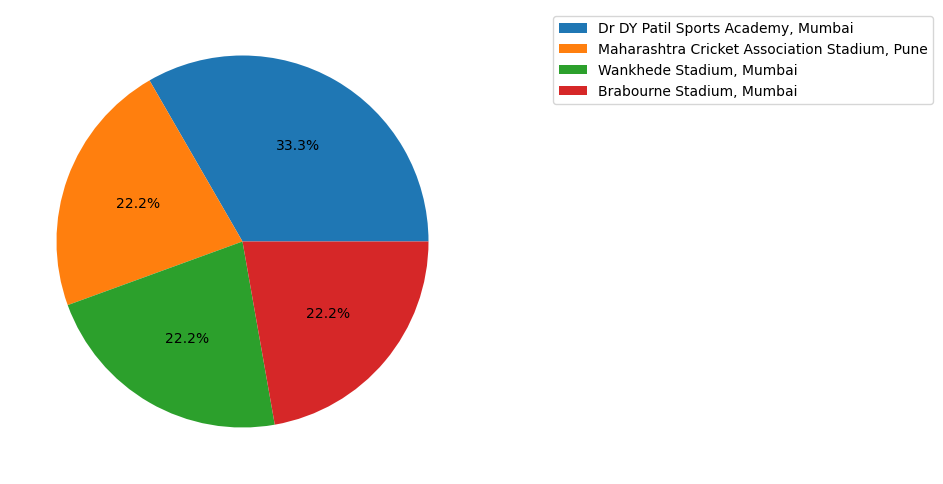

Winner:  Sunrisers Hyderabad


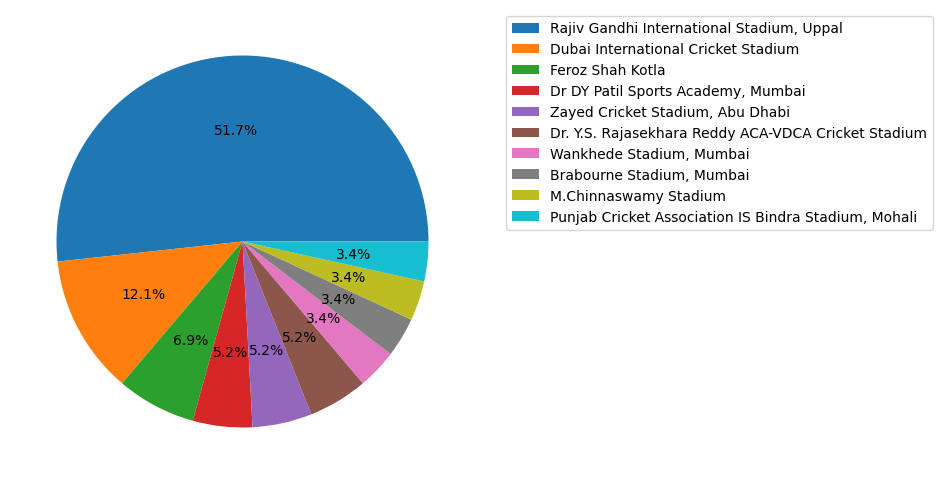

Winner:  Delhi Capitals


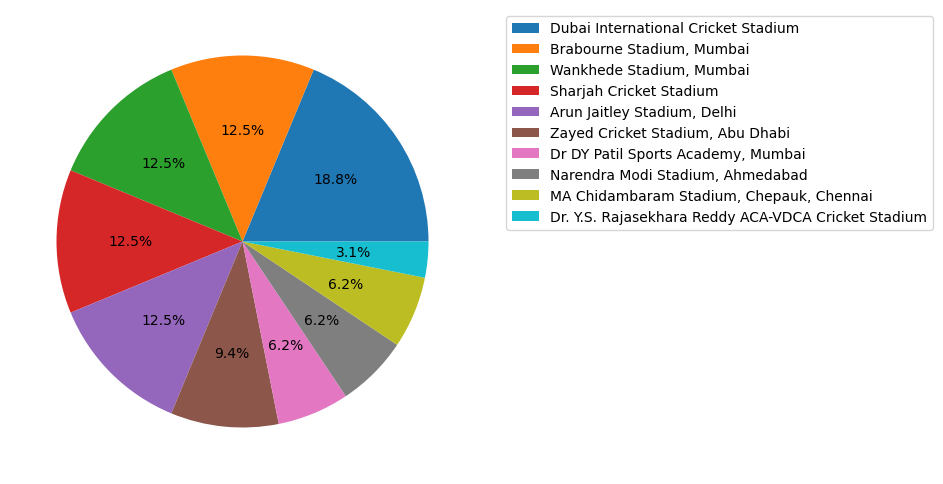

Winner:  Kolkata Knight Riders


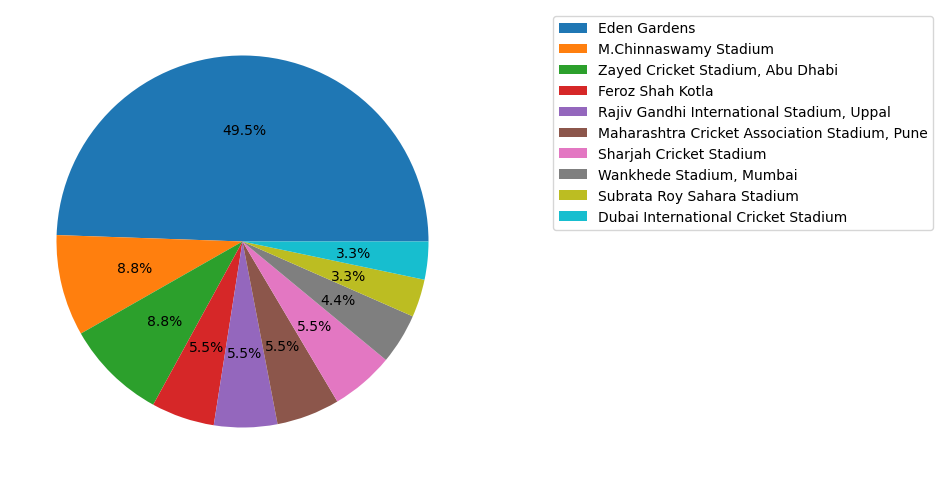

Winner:  Chennai Super Kings


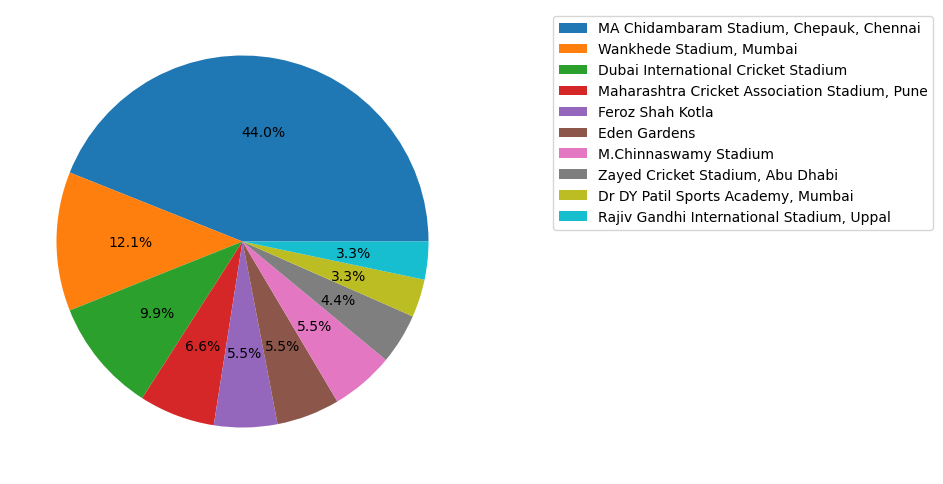

Winner:  Kings XI Punjab


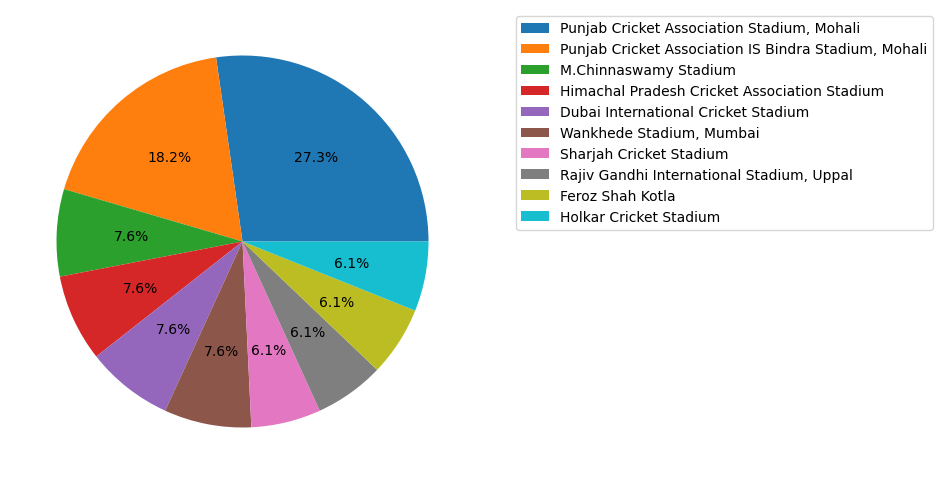

Winner:  Delhi Daredevils


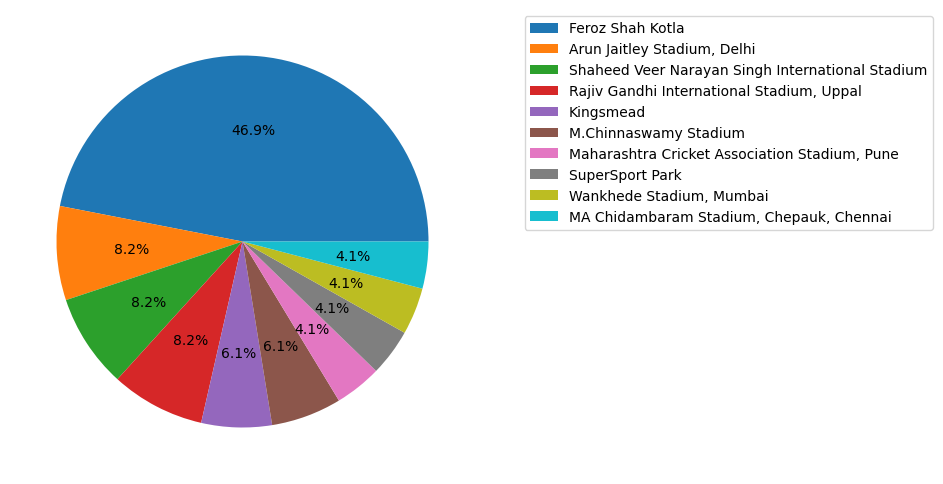

Winner:  Rising Pune Supergiant


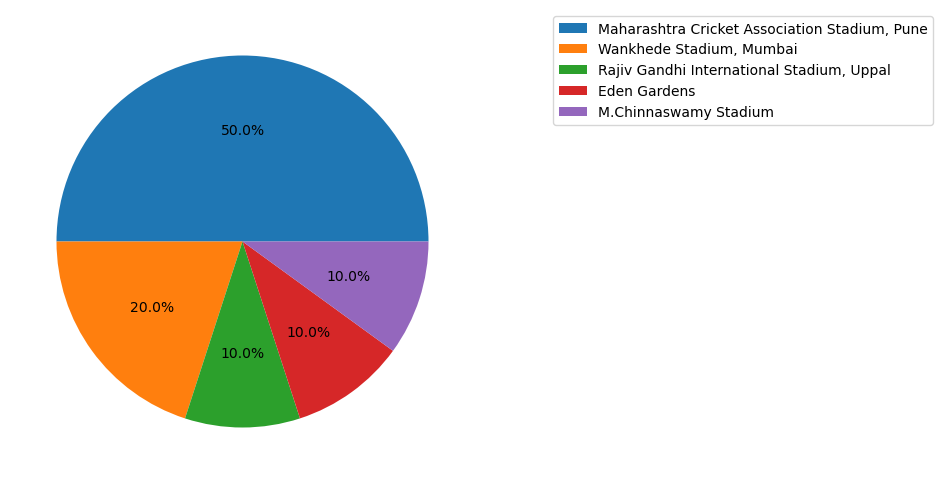

Winner:  Gujarat Lions


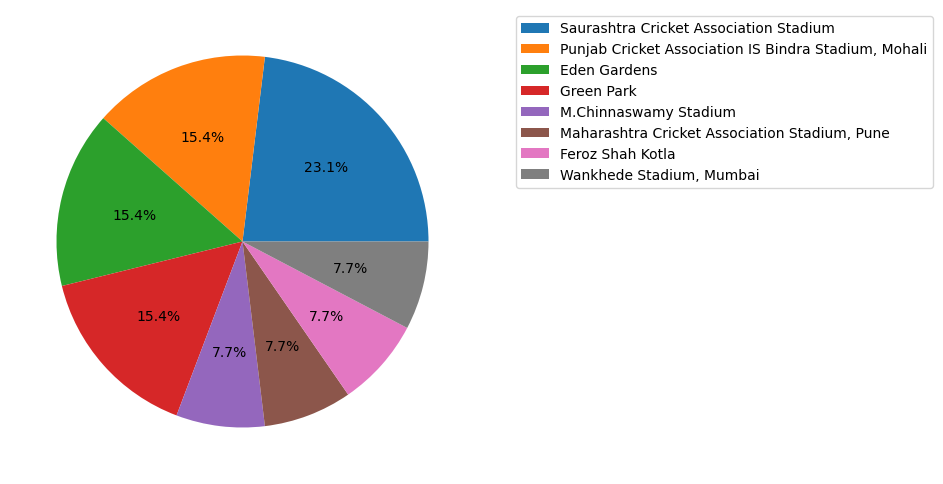

Winner:  Rising Pune Supergiants


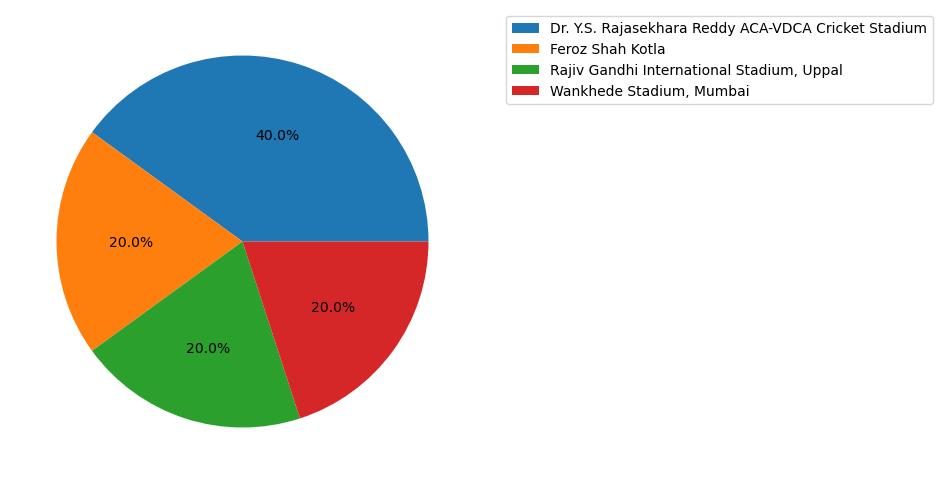

Winner:  Pune Warriors


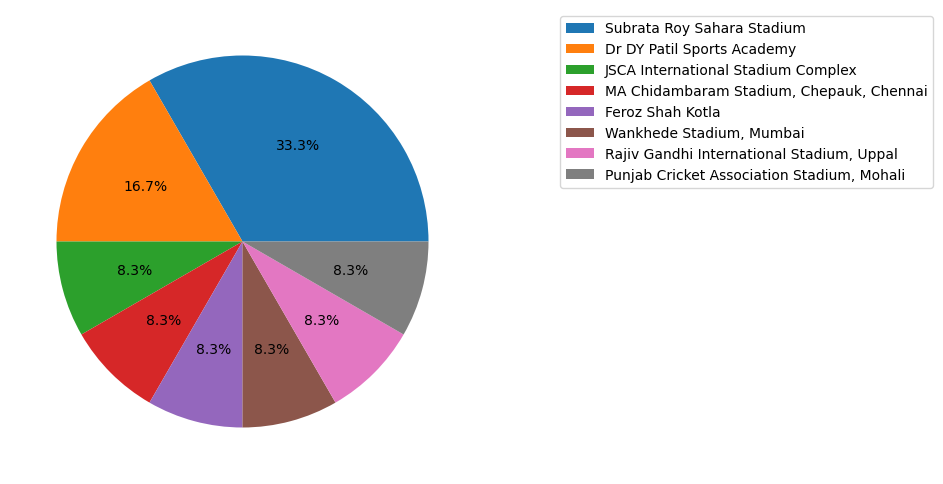

Winner:  Deccan Chargers


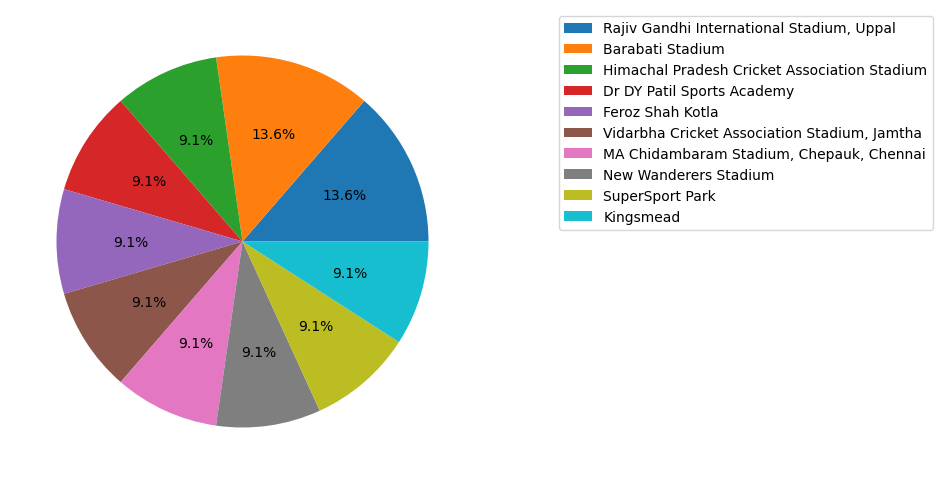

Winner:  Kochi Tuskers Kerala


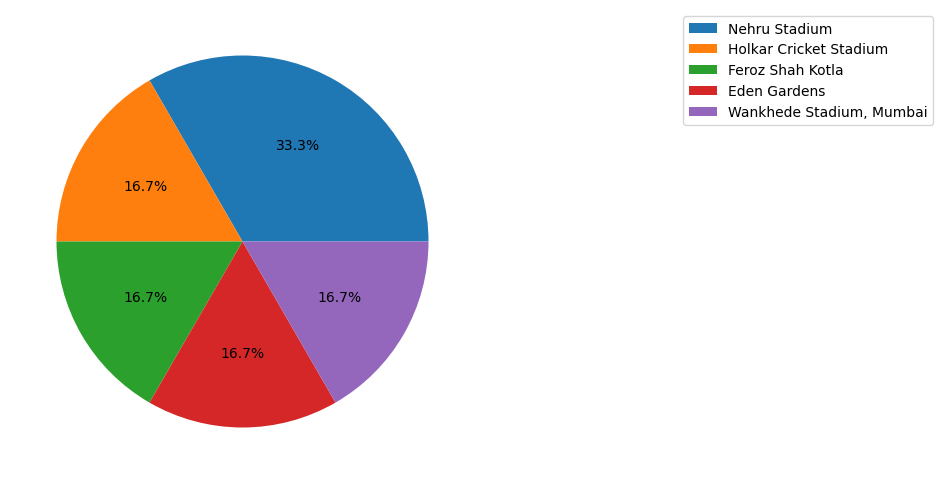

In [84]:
for i in ipl["WinningTeam"].unique():  # Get the each team from winner column
    print("Winner: ", i)
    plt.figure(figsize=(6,10))     # Adjusting the figure size
    plt.pie(ipl[ipl["WinningTeam"] == i]["Venue"].value_counts()[:10], autopct = "%1.1f%%")
    plt.legend(ipl[ipl["WinningTeam"] == i]["Venue"].value_counts()[:10].index, bbox_to_anchor = (2,1), loc = "upper right")
    plt.show()

In [85]:
# To get home ground of each team
homeground={}
for i in ipl.WinningTeam.unique():
    homeground[i]=ipl[ipl.WinningTeam==i].Venue.value_counts().head(1).index[0]

In [86]:
homeground

{'Gujarat Titans': 'Wankhede Stadium, Mumbai',
 'Rajasthan Royals': 'Sawai Mansingh Stadium',
 'Royal Challengers Bangalore': 'M.Chinnaswamy Stadium',
 'Punjab Kings': 'Wankhede Stadium, Mumbai',
 'Mumbai Indians': 'Wankhede Stadium, Mumbai',
 'Lucknow Super Giants': 'Dr DY Patil Sports Academy, Mumbai',
 'Sunrisers Hyderabad': 'Rajiv Gandhi International Stadium, Uppal',
 'Delhi Capitals': 'Dubai International Cricket Stadium',
 'Kolkata Knight Riders': 'Eden Gardens',
 'Chennai Super Kings': 'MA Chidambaram Stadium, Chepauk, Chennai',
 'Kings XI Punjab': 'Punjab Cricket Association Stadium, Mohali',
 'Delhi Daredevils': 'Feroz Shah Kotla',
 'Rising Pune Supergiant': 'Maharashtra Cricket Association Stadium, Pune',
 'Gujarat Lions': 'Saurashtra Cricket Association Stadium',
 'Rising Pune Supergiants': 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
 'Pune Warriors': 'Subrata Roy Sahara Stadium',
 'Deccan Chargers': 'Rajiv Gandhi International Stadium, Uppal',
 'Kochi Tuskers Ke

In [87]:
# Gives number of matches played by each team on their homeground
matches_played_homeground={}
for i in homeground:
    matches_played_homeground[i]=len(ipl[ipl.Venue==homeground[i]])

In [88]:
matches_played_homeground 

{'Gujarat Titans': 104,
 'Rajasthan Royals': 47,
 'Royal Challengers Bangalore': 77,
 'Punjab Kings': 104,
 'Mumbai Indians': 104,
 'Lucknow Super Giants': 20,
 'Sunrisers Hyderabad': 64,
 'Delhi Capitals': 46,
 'Kolkata Knight Riders': 77,
 'Chennai Super Kings': 67,
 'Kings XI Punjab': 35,
 'Delhi Daredevils': 59,
 'Rising Pune Supergiant': 35,
 'Gujarat Lions': 10,
 'Rising Pune Supergiants': 13,
 'Pune Warriors': 16,
 'Deccan Chargers': 64,
 'Kochi Tuskers Kerala': 5}

In [89]:
# Gives the number of matches won by each team on their homeground
matches_won_homeground={}
for i in homeground:
    matches_won_homeground[i]=len(ipl.loc[(ipl['Venue']==homeground[i]) & (ipl['WinningTeam']==i)])

In [90]:
matches_won_homeground

{'Gujarat Titans': 3,
 'Rajasthan Royals': 32,
 'Royal Challengers Bangalore': 37,
 'Punjab Kings': 3,
 'Mumbai Indians': 44,
 'Lucknow Super Giants': 3,
 'Sunrisers Hyderabad': 30,
 'Delhi Capitals': 6,
 'Kolkata Knight Riders': 45,
 'Chennai Super Kings': 40,
 'Kings XI Punjab': 18,
 'Delhi Daredevils': 23,
 'Rising Pune Supergiant': 5,
 'Gujarat Lions': 3,
 'Rising Pune Supergiants': 2,
 'Pune Warriors': 4,
 'Deccan Chargers': 3,
 'Kochi Tuskers Kerala': 2}

In [91]:
# Success percentage of each team on their homeground
success_percentage={}
for i in homeground:
    success_percentage[i]=(matches_won_homeground[i]/matches_played_homeground [i])*100
success_percentage

{'Gujarat Titans': 2.8846153846153846,
 'Rajasthan Royals': 68.08510638297872,
 'Royal Challengers Bangalore': 48.05194805194805,
 'Punjab Kings': 2.8846153846153846,
 'Mumbai Indians': 42.30769230769231,
 'Lucknow Super Giants': 15.0,
 'Sunrisers Hyderabad': 46.875,
 'Delhi Capitals': 13.043478260869565,
 'Kolkata Knight Riders': 58.44155844155844,
 'Chennai Super Kings': 59.70149253731343,
 'Kings XI Punjab': 51.42857142857142,
 'Delhi Daredevils': 38.983050847457626,
 'Rising Pune Supergiant': 14.285714285714285,
 'Gujarat Lions': 30.0,
 'Rising Pune Supergiants': 15.384615384615385,
 'Pune Warriors': 25.0,
 'Deccan Chargers': 4.6875,
 'Kochi Tuskers Kerala': 40.0}

In [92]:
# assigning values to the variables
teams = list(success_percentage.keys())
success_percentage = list(success_percentage.values())

In [93]:
# # plotting barplot of Success_percentage with above values
# sns.barplot(teams,success_percentage)
# plt.xticks(rotation=90)
# plt.xlabel("Teams", fontsize = 14)
# plt.ylabel("Success Percentage", fontsize = 14)
# plt.title("Success percentage of each team at thier home grounds", fontsize = 15)
# plt.show()


# #Teams have more proportion of winning matches when they play at their home ground as they are playing more matches 
# #at their home ground so There is no clear evident to state that playing at home ground is advantage to all team
# #Chennai Super Kings has highest Success rate of winning at home ground followed by Rajasthan Royals.

Possibility of winning the match after winning toss:  51.69 %


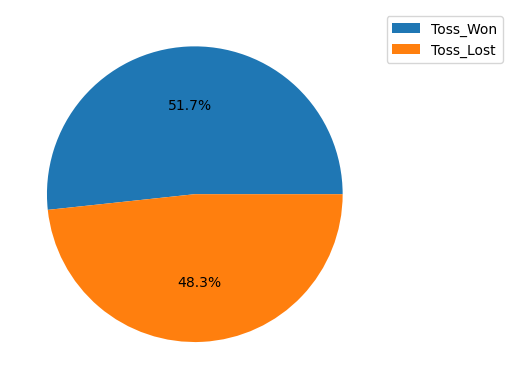

In [94]:
x = len(ipl[ipl["WinningTeam"]== ipl["TossWinner"]]) # Number of matches won by teams when they won toss
y = len(ipl)  # Total number of matches
print("Possibility of winning the match after winning toss: ", round(x/y*100, 2),"%")
plt.pie([x, y-x], autopct = "%1.1f%%")
plt.legend(["Toss_Won","Toss_Lost"], bbox_to_anchor = (1,1,))
plt.show()

Winning percentage of team when the team elect to bat first:  45.42857142857143


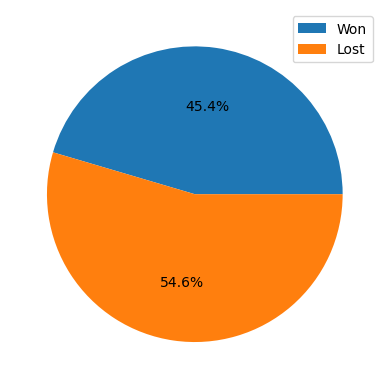

In [95]:
# When won the toss and elected to Bat first
x_bat_winner = len(ipl[(ipl["WinningTeam"]==ipl["TossWinner"]) & (ipl["TossDecision"]== "bat")])
y_bat = len(ipl[ipl["TossDecision"] == "bat"])
print("Winning percentage of team when the team elect to bat first: ",x_bat_winner/y_bat*100)

plt.pie([x_bat_winner, y_bat -x_bat_winner ], autopct = "%1.1f%%")
plt.legend(["Won", "Lost"], bbox_to_anchor = (1,1))
plt.show()

Winning percentage of team when the team elect to field first:  55.369127516778526


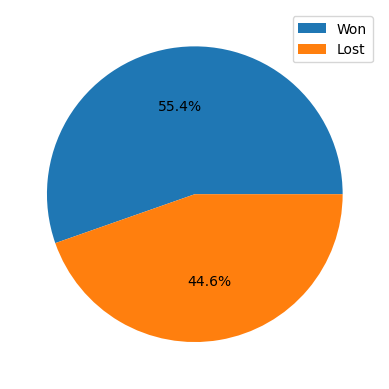

In [96]:

# When won the toss and elected to Field first
x_field_winner = len(ipl[(ipl["WinningTeam"]==ipl["TossWinner"]) & (ipl["TossDecision"]== "field")])
y_field = len(ipl[ipl["TossDecision"] == "field"])
print("Winning percentage of team when the team elect to field first: ",x_field_winner/y_field*100)

plt.pie([x_field_winner, y_field - x_field_winner ], autopct = "%1.1f%%")
plt.legend(["Won", "Lost"], bbox_to_anchor = (1,1), loc = "upper right")
plt.show()

According to data set there are 946 matches played by 15 teams in 35 venues
#Mumbai Indians has played more matches and won highest number of matches
#Teams winning toss has very little edge over the toss lossing team, but the team 
#which win the toss and decides to field first has more probability to win the match
#Mumbai Indians has won the match with largest margin
#Chennai Super Kings has highest percentage of winning rate at home ground, that 
#shows they analyze the ground conditions well and play with proper 11 players
#Teams have more proportion of winning matches when they play at their home ground as 
#they are playing more matches at their home ground, so there is no clear evident to state
#that playing at home ground is advantage to all team
#Ab de Villiers has won highest number of player of the match awards followed by 
#CH Gayle both belong to Royal Challengers Benagaluru but they failed to make their team lift the
#trophy , it shows that in IPL the team which is getting equal contibution from each player is more successfull

In [97]:
!pip install pandas-profiling


  Using cached pandas_profiling-3.6.6-py2.py3-none-any.whl (324 kB)
  Using cached ydata_profiling-4.1.2-py2.py3-none-any.whl (345 kB)
  Using cached matplotlib-3.6.3-cp310-cp310-win_amd64.whl (7.2 MB)
     -------------------------------------- 40.1/40.1 MB 309.9 kB/s eta 0:00:00
  Using cached ImageHash-4.3.1-py2.py3-none-any.whl (296 kB)
  Using cached htmlmin-0.1.12.tar.gz (19 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached typeguard-2.13.3-py3-none-any.whl (17 kB)
  Using cached pydantic-1.10.7-cp310-cp310-win_amd64.whl (2.1 MB)
  Using cached phik-0.12.3-cp310-cp310-win_amd64.whl (663 kB)
  Using cached visions-0.7.5-py3-none-any.whl (102 kB)
  Using cached multimethod-1.9.1-py3-none-any.whl (10 kB)
  Using cached tangled_up_in_unicode-0.2.0-py3-none-any.whl (4.7 MB)
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27092 sha256=1902d7eb2cb6d5cabae2acd8124a830ffc26991f760cdc59a709f9d

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\anik\\anaconda3\\Lib\\site-packages\\~cipy\\cluster\\_hierarchy.cp310-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [98]:
from pandas_profiling import ProfileReport

ModuleNotFoundError: No module named 'pandas_profiling'

In [ ]:
profile1 = ProfileReport(ipl)
profile1.to_notebook_iframe()